# Sommaire :


### <a href="#C1"> **Partie 1 : Contexte et Objectifs**</a>

 - Contexte
 - Objectifs

<b><hr></b>

### <a href="#C2"> **Partie 2 : Mise en place de l'espace de travail**</a>
 - <a href="#C21"> 2.1 Import des packages</a>
 - <a href="#C22"> 2.2 Repertoire de travail</a>
 - <a href="#C23"> 2.3 Import des datas frames</a>
 - <a href="#C24"> 2.4 Definir la variable cible</a>

<b><hr></b>

### <a href="#C3"> **Partie 3 : Data preparation**</a>
 - <a href="#C31"> 3.1 Gestion des outliers</a>
  - <a href="#C311"> 3.1.1 Boxplots</a>
  - <a href="#C312"> 3.1.2 Suppression des outliers</a>
    - <a href="#C3121"> 3.1.2.1 LocalOutlierFactor</a>
    - <a href="#C3122"> 3.1.2.2 Ecart InterQuartile</a>
 - <a href="#C32"> 3.2 Graphiques</a>
 - <a href="#C33"> 3.3 Transformation des variables</a>
 - <a href="#C34"> 3.4 Create X & y</a>
 - <a href="#C35"> 3.5 Train Test Split</a>
 - <a href="#C36"> 3.6 Label Encoder </a>
 - <a href="#C37"> 3.7 Feature Scaling </a>
    
<b><hr></b>
 
### <a href="#C4"> **Partie 4 : Modélisation**</a>
 - <a href="#C41"> 4.1 Dummy Estimator </a>
 - <a href="#C42"> 4.2 Model type </a>
 - <a href="#C43"> 4.3 Feature Selection </a>
 - <a href="#C44"> 4.4 Model Selection </a>
 - <a href="#C45"> 4.5 Fit best Model and get test score </a>
 - <a href="#C46"> 4.6 Save Model </a>
 
<b><hr></b>

### <a href="#C5"> **Partie 5 : Benchmark**</a>


</br>

</br>

</br>

</br>

# <a name="C1">**Partie 1 : Contexte et Objectifs**</a> 

Contexte 

Objectifs

<hr>

</br>

# <a name="C2"><font color='blue'>**Partie 2 : Mise en place de l'espace de travail**</font></a> 

### <a name="C21"><font color='blue'>2.1 Imports packages</font></a> 

###### <b><font color='blue'>2.1.0 Requirements</font></b>
- <b>Built-in</b>       : os, warnings
- <b>Data</b>           : pandas, numpy
- <b>Visualisations</b> : matplotlib, seaborn
- <b>Preprocessing</b>  : sklearn, scipy

###### <b><font color='blue'>2.1.1 Imports</font></b>

In [1]:
# Built-in
import os,warnings

# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

#Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer

# feature selection
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import entropy

# metrics
import sklearn as sk
from sklearn.metrics import auc,roc_curve,confusion_matrix

# Imputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Modele Selection
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV

# Model
from sklearn import dummy
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import LinearSVR,SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor,VotingRegressor,HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn import kernel_ridge


C:\Users\eleor\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


###### <b><font color='blue'>2.1.2 Options</font></b>

In [2]:
#warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='once')

In [3]:
# option de cellule des pandas dataset
pd.set_option("display.max_rows", 200) #parametre le nombre de ligne affichable dans dataframe pandas
pd.set_option("expand_frame_repr", True) #permet de deplier les colonnes cachées
pd.set_option("display.max_columns",200 ) #permet d'afficher jusqu'à 200 colonnes dans une cellule

In [4]:
pd.set_option('max_colwidth', None)

### <a name="C22"><font color='blue'>2.2 Working directory</font></a> 

In [5]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '00_EDA P4.ipynb',
 '02_modelisation_consommation totale d’énergie.ipynb',
 '02_modelisation_emission de CO2.ipynb',
 'Brouillon.ipynb',
 'data',
 'ModeleCO2.ipynb',
 'README.md',
 'Untitled.ipynb']

In [6]:
os.listdir('data/cleaned')

['df_cleaned.csv', 'df_cleaned_AllUse.csv']

In [7]:
path = 'data/cleaned/'
# A completer
filename = "df_cleaned.csv"

### <a name="C23"><font color='blue'>2.3 Import DataFrames</font></a> 

In [8]:
# df_encod = pd.read_csv(path+'df_cleaned.csv',sep=';',index_col='OSEBuildingID')

df = pd.read_csv(path+filename,sep=';',index_col='OSEBuildingID')
#df['ZipCode'] = df.ZipCode.apply(int).apply(str)
df.head()

,BuildingType,PrimaryPropertyType,ZipCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,FourthLargestPropertyUseType,FifthLargestPropertyUseType,SixthLargestPropertyUseType,Age
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,
1,NonResidential,Hotel,98101,downtown,47.61220,-122.33799,1.0,12,88434,0,88434,hotel,88434.0,void,0.0,void,0.0,60.0,7456910.0,249.98,void,void,void,89
2,NonResidential,Hotel,98101,downtown,47.61317,-122.33393,1.0,11,103566,15064,88502,hotel,83880.0,parking,15064.0,restaurant,4622.0,61.0,8664479.0,295.86,void,void,void,20
3,NonResidential,Hotel,98101,downtown,47.61393,-122.33810,1.0,41,956110,196718,759392,hotel,756493.0,void,0.0,void,0.0,43.0,73937112.0,2089.28,void,void,void,47
5,NonResidential,Hotel,98101,downtown,47.61412,-122.33664,1.0,10,61320,0,61320,hotel,61320.0,void,0.0,void,0.0,56.0,6946800.5,286.43,void,void,void,90
8,NonResidential,Hotel,98121,downtown,47.61375,-122.34047,1.0,18,175580,62000,113580,hotel,123445.0,parking,68009.0,swimming pool,0.0,75.0,14656503.0,505.01,void,void,void,36


In [9]:
df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'Neighborhood',
       'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
       'FourthLargestPropertyUseType', 'FifthLargestPropertyUseType',
       'SixthLargestPropertyUseType', 'Age'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1536 entries, 1 to 50226
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1536 non-null   object 
 1   PrimaryPropertyType              1536 non-null   object 
 2   ZipCode                          1536 non-null   object 
 3   Neighborhood                     1536 non-null   object 
 4   Latitude                         1536 non-null   float64
 5   Longitude                        1536 non-null   float64
 6   NumberofBuildings                1536 non-null   float64
 7   NumberofFloors                   1536 non-null   int64  
 8   PropertyGFATotal                 1536 non-null   int64  
 9   PropertyGFAParking               1536 non-null   int64  
 10  PropertyGFABuilding(s)           1536 non-null   int64  
 11  LargestPropertyUseType           1532 non-null   object 
 12  LargestPropertyUseT

### <a name="C24"><font color='blue'>2.4 Define Target Data</font></a> 

In [11]:
Target_data = 'TotalGHGEmissions'
df.drop(columns=['SiteEnergyUseWN(kBtu)'],inplace=True)

#### Suppression des lignes dont SiteEnergyUseWN(kBtu) sont NAs

In [12]:
df = df[df[Target_data].notna()]
df.shape

(1536, 23)

<hr>

</br>

# <a name="C3"><font color='teal'>**Partie 3 : Data preparation**</font></a> 

### <a name="C31"><font color='teal'>3.1 Gestion des outliers</font></a>

#### <a name="C311"><font color='teal'>3.1.1 Boxplots</font></a>

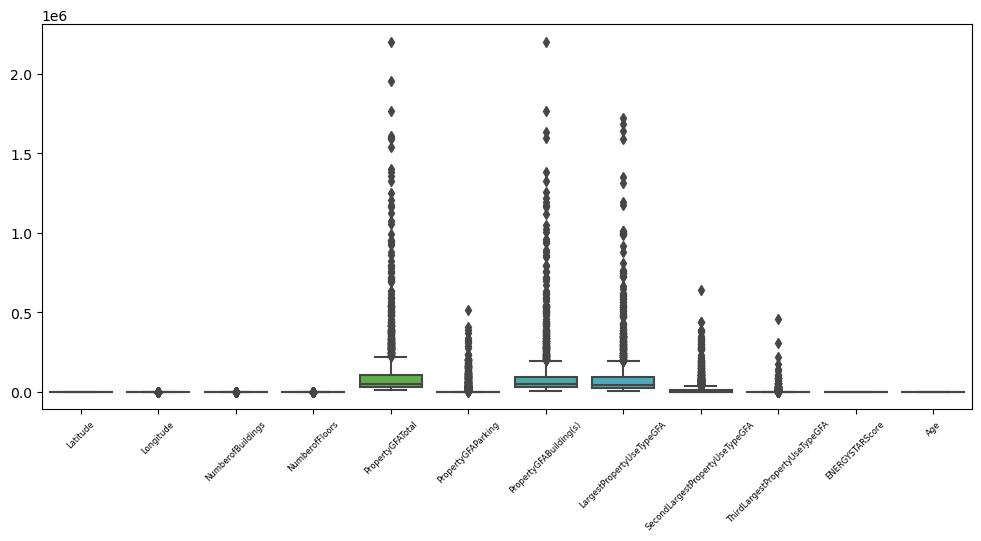

In [13]:
fig = plt.figure(figsize=(12, 5))
sns.boxplot(data = df.drop(columns=Target_data).select_dtypes(include=[np.number]) ,showfliers = True)
plt.xticks(rotation=45,size = 6);

#### <a name="C312"><font color='teal'>3.1.2 Suppression des outliers</font></a>

##### <a name="C3121"><font color='teal'> 3.1.2.1 LocalOutlierFactor</font></a>

##### <a name="C3122"><font color='teal'> 3.1.2.2 Ecart InterQuartile</font></a>

##### <a name="C3123"><font color='teal'> 3.1.2.3 Algorithmes sklearn</font></a>

### <a name="C32"><font color='teal'> 3.2 Graphiques</font></a>

#### <font color='teal'> 3.2.1 Histogramme</font>

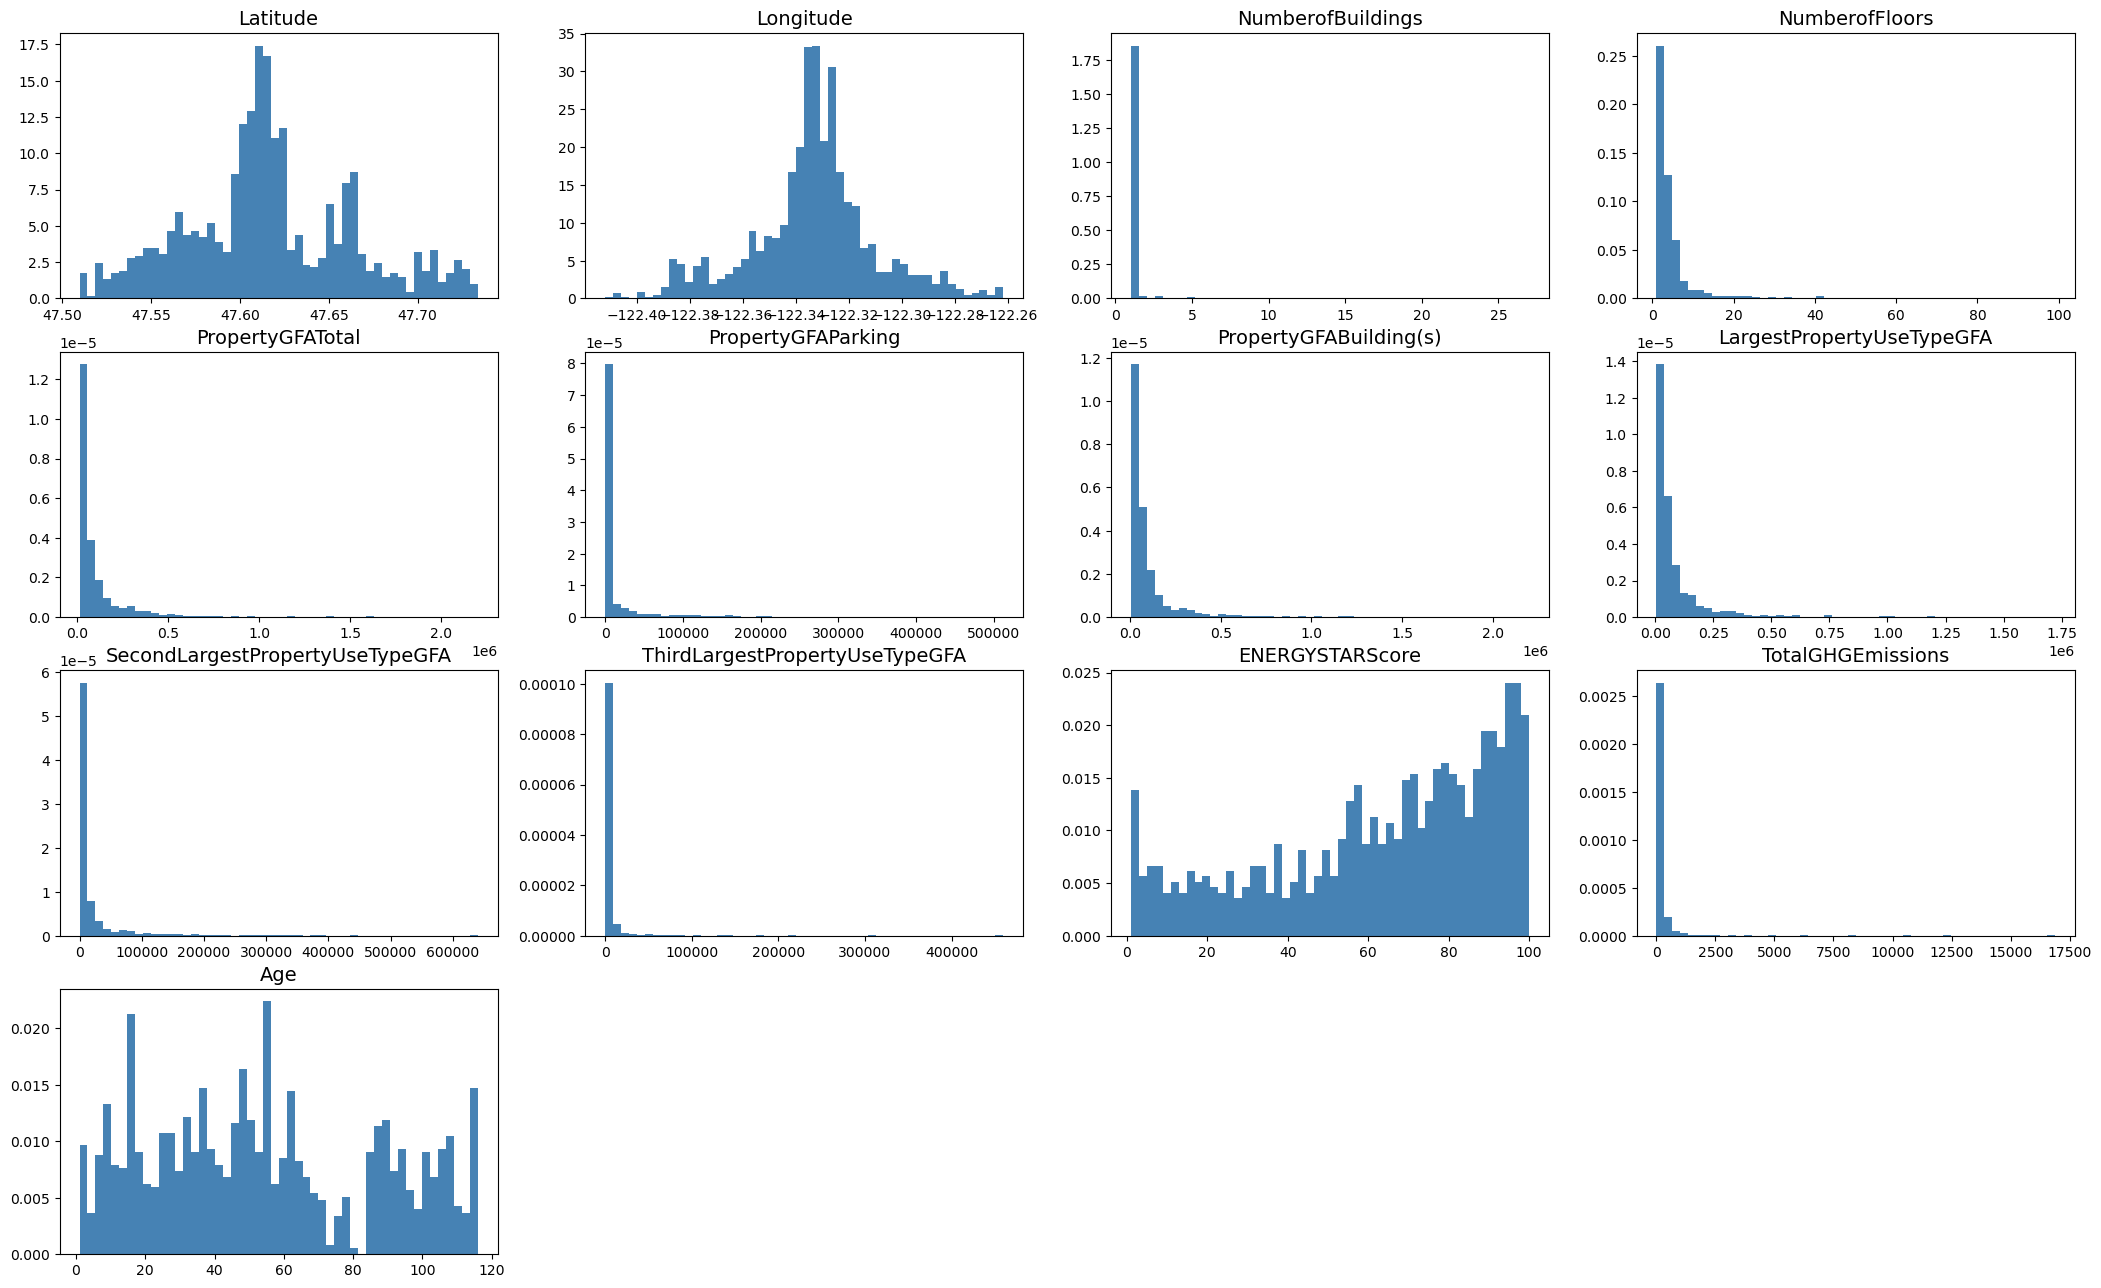

In [14]:
fig = plt.figure(figsize=(26, 20))
X_g = df.select_dtypes(include=np.number)
for feat_idx in range(X_g.shape[1]):
    ax = fig.add_subplot(5,4, (feat_idx+1))
    h = ax.hist(X_g.iloc[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(X_g.columns[feat_idx], fontsize=14)
    
del X_g

#### <font color='teal'> 3.2.2 Pairplot</font>

In [15]:
df.select_dtypes(include=np.number).columns

Index(['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'TotalGHGEmissions', 'Age'],
      dtype='object')

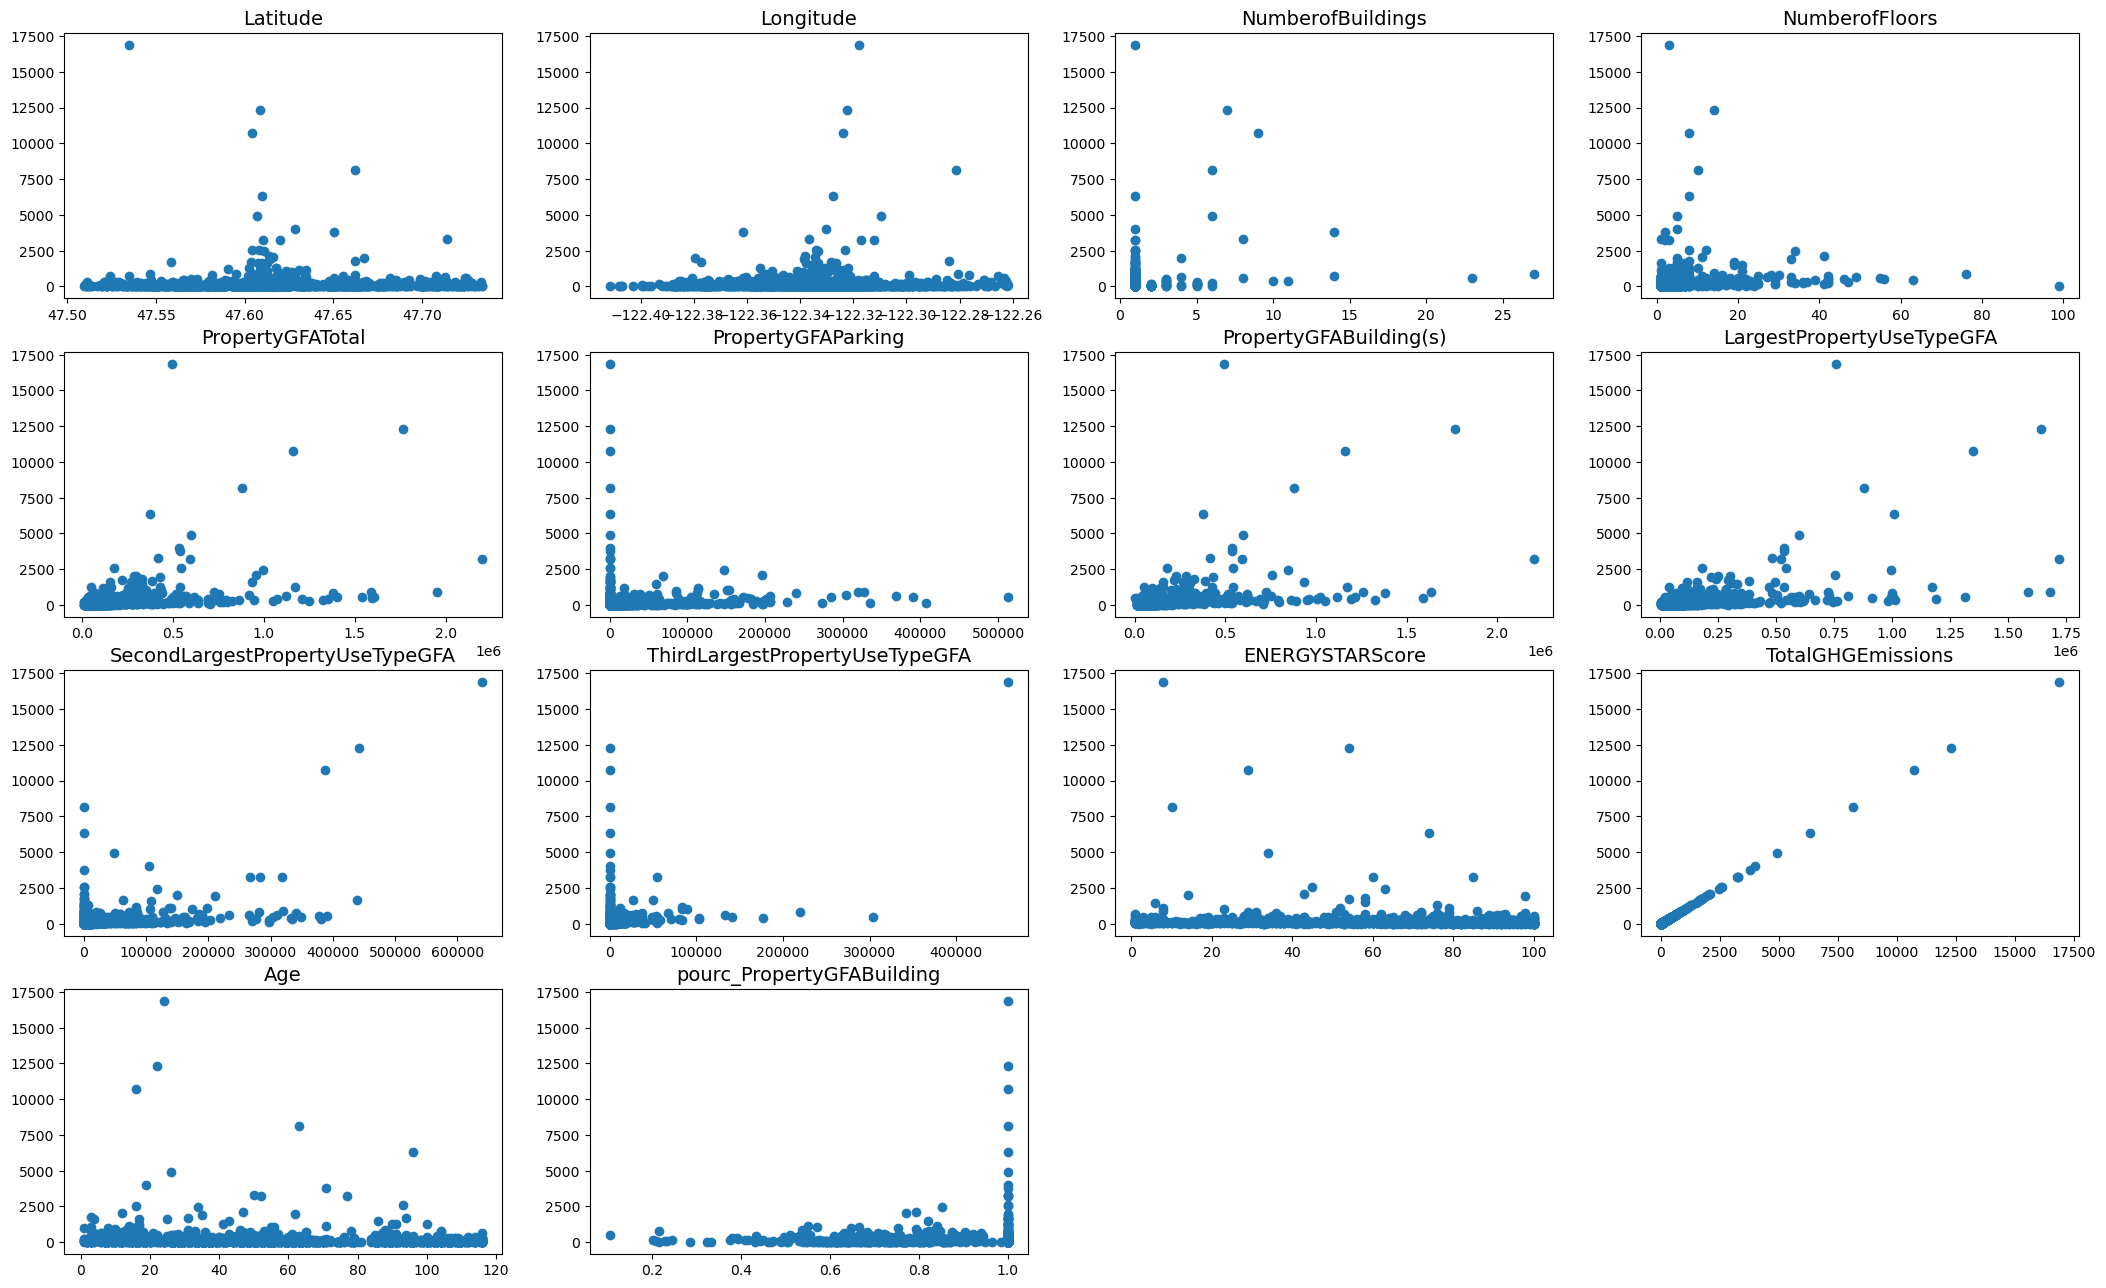

In [16]:
fig = plt.figure(figsize=(26, 20))
X_g = df.select_dtypes(include=np.number)

#X_g['pourc_PropertyGFAParking'] = X_g['PropertyGFAParking']/X_g['PropertyGFATotal']
X_g['pourc_PropertyGFABuilding'] = X_g['PropertyGFABuilding(s)']/X_g['PropertyGFATotal']

for feat_idx in range(X_g.shape[1]):
    ax = fig.add_subplot(5,4, (feat_idx+1))
    h = ax.scatter(X_g.iloc[:, feat_idx],X_g[Target_data] )
    ax.set_title(X_g.columns[feat_idx], fontsize=14)
    
del X_g

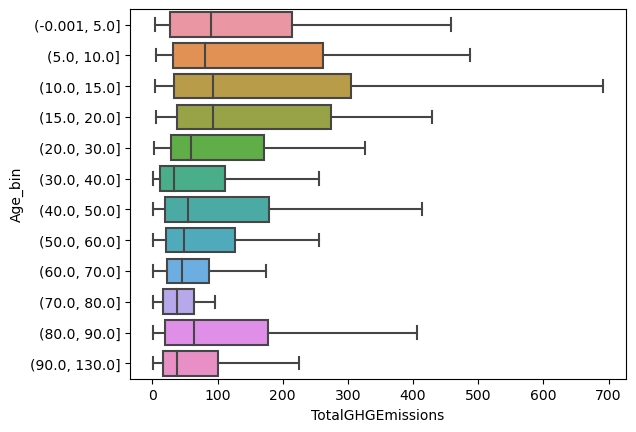

In [17]:
X_num_to_test = df.select_dtypes(include=np.number).copy()
X_num_to_test['Age_bin'] = pd.cut(X_num_to_test.Age,bins=[0,5,10,15,20,30,40,50,60,70,80,90,130],include_lowest=True)
sns.boxplot(data=X_num_to_test,x = Target_data, y = 'Age_bin',showfliers=False);
del X_num_to_test

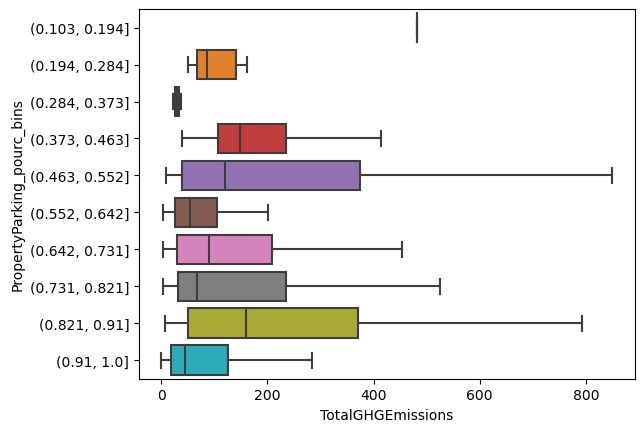

In [18]:
X_num_to_test = df.select_dtypes(include=np.number).copy()
X_num_to_test['PropertyBuilding_pourc'] = X_num_to_test['PropertyGFABuilding(s)']/X_num_to_test['PropertyGFATotal']
X_num_to_test['PropertyParking_pourc_bins'] = pd.cut(X_num_to_test.PropertyBuilding_pourc,bins=10,include_lowest=True)
sns.boxplot(data=X_num_to_test,x = Target_data, y = 'PropertyParking_pourc_bins',showfliers=False);
del X_num_to_test

In [19]:
df['Age_bin'] = pd.cut(df.Age,bins=[0,5,10,15,20,50,80,130],include_lowest=True)
df['PropertyGFAParking_bins'] = pd.cut(df.PropertyGFAParking,bins=[0,50000,600000],include_lowest=True,
                                       labels=['<50000','>50000'] )

<div class="alert alert-info">Les colonnes Neighborhood, ZipCode, PropertyGFAParking ne semblent pas importantes.</div> 

In [20]:
df[['TotalGHGEmissions',Target_data]].describe()

,TotalGHGEmissions,TotalGHGEmissions
count,1536.000000,1536.000000
mean,186.709909,186.709909
std,730.164677,730.164677
min,0.400000,0.400000
25%,20.655000,20.655000
50%,49.845000,49.845000
75%,146.947500,146.947500
max,16870.980000,16870.980000


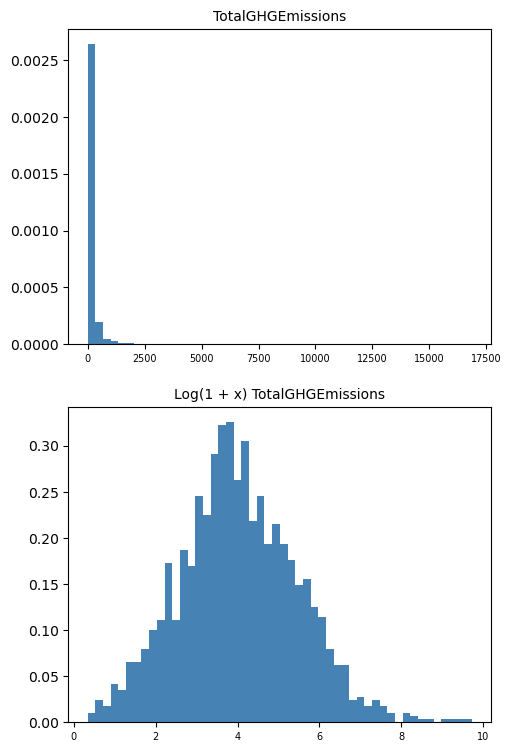

In [21]:
fig = plt.figure(figsize=(12, 9))

for idx,feat in enumerate([Target_data]):
    for i,tr in enumerate(['raw','log']):
        if tr == 'raw':
            ax = fig.add_subplot(2,2, (idx+i+1))
            h = ax.hist(df[feat], bins=50, color='steelblue', density=True, edgecolor='none')
            ax.set_title(feat, fontsize=10)
            ax.xaxis.set_tick_params(labelsize=7)
        else:
            ax = fig.add_subplot(2,2, (idx+i+2))
            h = ax.hist(np.log1p(df[feat]), bins=50, color='steelblue', density=True, edgecolor='none')
            ax.set_title('Log(1 + x) '+feat, fontsize=10)
            ax.xaxis.set_tick_params(labelsize=7)
            

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
class CustomTransformerytology(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, y, X=None):
        return self
    
    def transform(self, y, X=None):
        # Perform arbitary transformation
        return np.log1p(y)
    
    def inverse_transform(self,y, X=None):
        return np.expm1(y)

### <a name="C33"><font color='teal'>3.3 Feature Engenering</font></a> 

In [30]:
for id, val in enumerate(kendall_values.TotalGHGEmissions ): print(id, val, str(val));

0 -0.1133936505617217 -0.1133936505617217
1 -0.08447432247257113 -0.08447432247257113
2 -0.018554670233780834 -0.018554670233780834
3 0.043302317168225475 0.043302317168225475
4 0.1106196950970909 0.1106196950970909
5 0.1223048342802495 0.1223048342802495
6 0.1590269833659076 0.1590269833659076
7 0.1677975899995134 0.1677975899995134
8 0.21734515795872314 0.21734515795872314
9 0.3861836719287829 0.3861836719287829
10 0.39793040546546354 0.39793040546546354
11 0.4014146850262732 0.4014146850262732


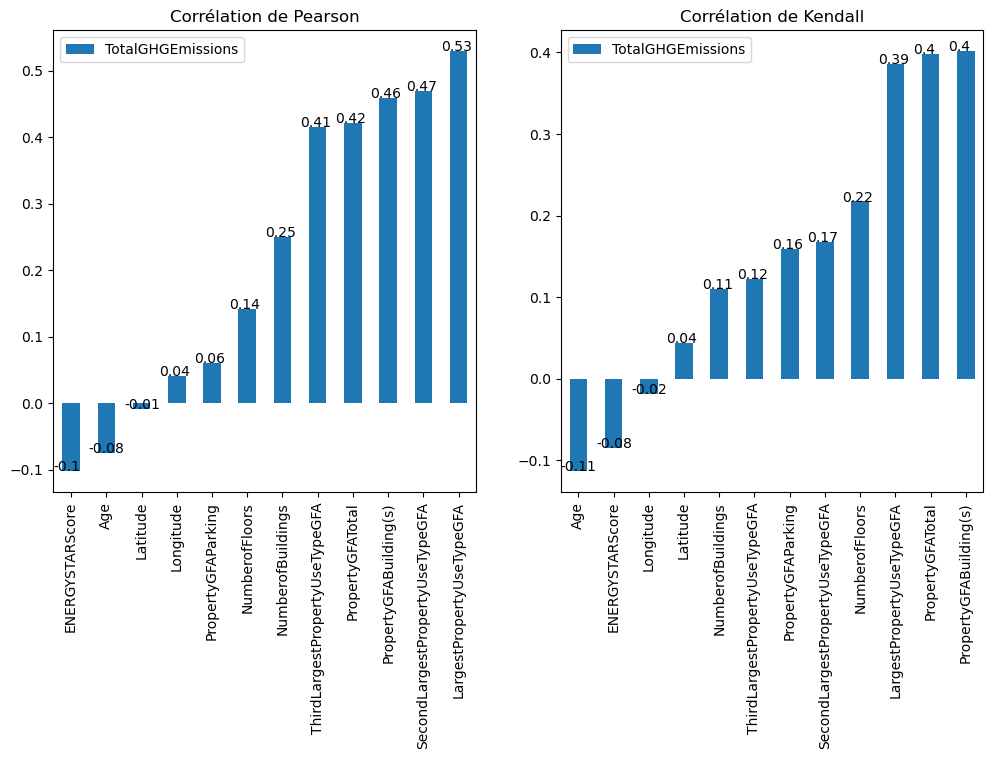

In [36]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(1, 2, 1)
pearson_values = df.corr()[[Target_data]]\
.sort_values(by = Target_data)\
.drop([Target_data])

pearson_values.plot(kind='bar',ax = ax1)
ax1.set_title("Corrélation de Pearson")
for id, val in enumerate(pearson_values[Target_data]): ax1.text(id-0.5, val, str(round(val,2)))

ax2 = plt.subplot(1, 2, 2)
kendall_values = df.corr(method = 'kendall')[[Target_data]]\
.sort_values(by = Target_data)\
.drop([Target_data])

kendall_values.plot(kind='bar',ax = ax2,)
ax2.set_title("Corrélation de Kendall")
for id, val in enumerate(kendall_values[Target_data]): ax2.text(id-0.5, val, str(round(val,2)));

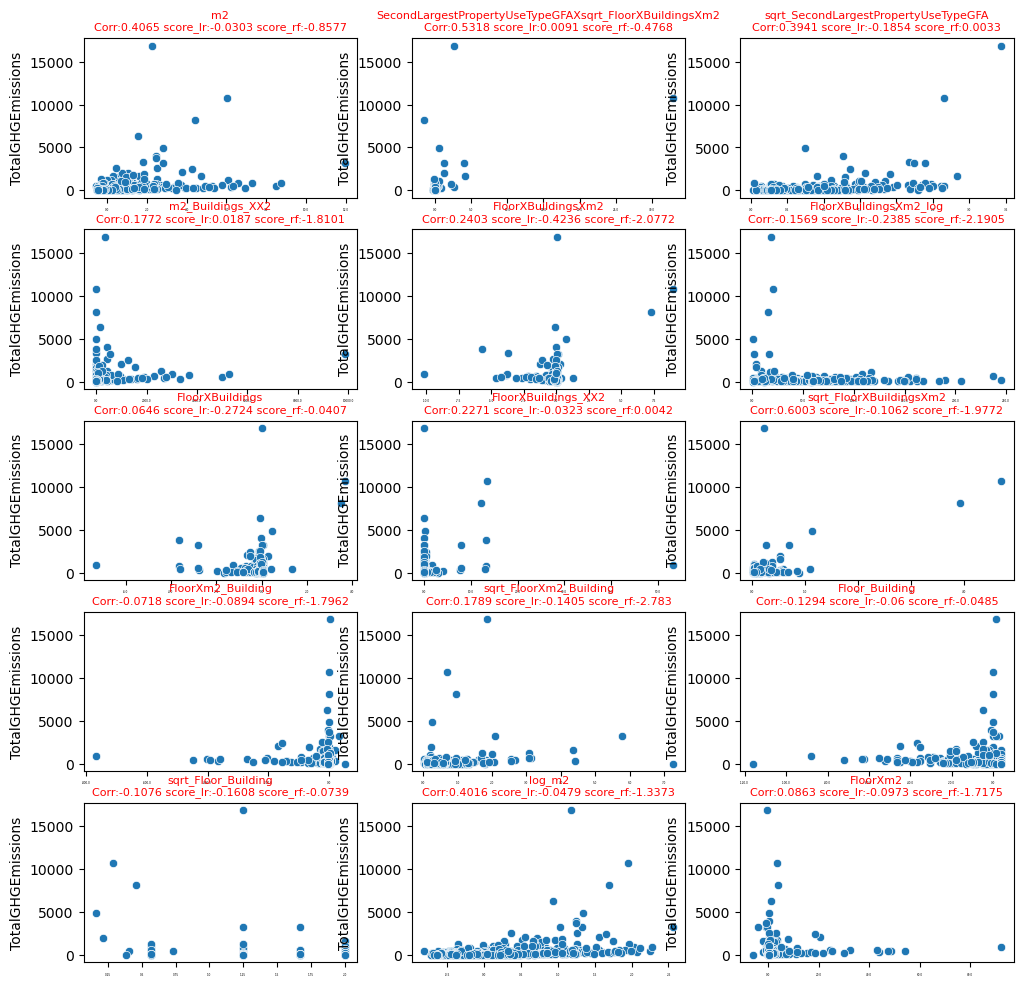

In [23]:
#warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore')

X_a_teste = df[["NumberofBuildings",'NumberofFloors','PropertyGFABuilding(s)','SecondLargestPropertyUseTypeGFA']].copy()

X_a_teste["NumberofBuildings"] = X_a_teste["NumberofBuildings"]+1
X_a_teste["NumberofFloors"] = X_a_teste["NumberofFloors"]+1

    

scaler = StandardScaler()
X_a_teste = scaler.fit_transform(X_a_teste)   

X_a_teste = np.c_[X_a_teste,df[Target_data]]

cols = scaler.feature_names_in_.tolist()
cols.append(Target_data)

X_a_teste = pd.DataFrame(X_a_teste,columns=cols)

# score à battre
X_a_teste['m2'] =   ( X_a_teste['PropertyGFABuilding(s)'] )
X_a_teste['LargestPropertyUseTypeGFA'] =   ( X_a_teste['LargestPropertyUseTypeGFA'] )

# surface total au sol habitable
#Nombre de batiment * nombre d'etage * la surface d'un batiment
X_a_teste['NumberofFloors'] * X_a_teste['PropertyGFABuilding(s)']


# Pourcentage de surface occupé par un batiment
# Surface occupé par le ou les batiments / Surface total
X_a_teste['PropertyGFABuilding(s)']/X_a_teste.PropertyGFATotal

X_a_teste['SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2'] = X_a_teste["SecondLargestPropertyUseTypeGFA"] * np.sqrt( X_a_teste['NumberofFloors'] * X_a_teste['PropertyGFABuilding(s)'] * X_a_teste["NumberofBuildings"])
X_a_teste['sqrt_SecondLargestPropertyUseTypeGFA'] =   np.sqrt( X_a_teste["SecondLargestPropertyUseTypeGFA"] )
X_a_teste['m2_Buildings_XX2'] =   ( X_a_teste['PropertyGFABuilding(s)'] / X_a_teste["NumberofBuildings"] )**2
X_a_teste['FloorXBuildingsXm2'] =  ( X_a_teste['NumberofFloors'] * np.sqrt(X_a_teste['PropertyGFABuilding(s)']) * X_a_teste["NumberofBuildings"])
X_a_teste['FloorXBuildingsXm2_log'] =  np.log2( X_a_teste['NumberofFloors'] * X_a_teste['PropertyGFABuilding(s)'] * X_a_teste["NumberofBuildings"])**2
X_a_teste['FloorXBuildings'] =   ( X_a_teste['NumberofFloors'] * X_a_teste["NumberofBuildings"])
X_a_teste['FloorXBuildings_XX2'] =   ( X_a_teste['NumberofFloors'] * X_a_teste["NumberofBuildings"])**2
X_a_teste['sqrt_FloorXBuildingsXm2'] =   np.sqrt( X_a_teste['NumberofFloors'] * X_a_teste['PropertyGFABuilding(s)'] * X_a_teste["NumberofBuildings"])
X_a_teste['FloorXm2_Building'] =   ((X_a_teste['NumberofFloors'] * X_a_teste['PropertyGFABuilding(s)']/X_a_teste["NumberofBuildings"]))
X_a_teste['sqrt_FloorXm2_Building'] =   np.sqrt((X_a_teste['NumberofFloors'] * X_a_teste['PropertyGFABuilding(s)']/X_a_teste["NumberofBuildings"]))
X_a_teste['Floor_Building'] =   (X_a_teste['NumberofFloors'] / X_a_teste['NumberofBuildings'] )
X_a_teste['sqrt_Floor_Building'] =   np.sqrt(X_a_teste['NumberofFloors'] / X_a_teste['NumberofBuildings'] )
X_a_teste['log_m2'] =   np.log1p(X_a_teste['PropertyGFABuilding(s)'] )
X_a_teste['FloorXm2'] =   (X_a_teste['NumberofFloors'] * X_a_teste['PropertyGFABuilding(s)'])

X_a_teste = X_a_teste.loc[X_a_teste.FloorXBuildings!=X_a_teste.FloorXBuildings.max()]
X_a_teste = X_a_teste.loc[X_a_teste.FloorXBuildings!=X_a_teste.FloorXBuildings.min()]

fig = plt.figure(figsize=(12, 12))
#X_a_teste = X_a_teste.loc[X_a_teste.FloorXBuildings!=X_a_teste.FloorXBuildings.max()]
for idx,col in enumerate(['m2','SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2','sqrt_SecondLargestPropertyUseTypeGFA',
                          'm2_Buildings_XX2','FloorXBuildingsXm2','FloorXBuildingsXm2_log',
                          'FloorXBuildings','FloorXBuildings_XX2',
                          'sqrt_FloorXBuildingsXm2',
                          'FloorXm2_Building','sqrt_FloorXm2_Building',
                         
                         "Floor_Building","sqrt_Floor_Building","log_m2","FloorXm2"]):
    axes = fig.add_subplot(5,3, (idx+1))
    
    X_data = X_a_teste.copy()
    #X_data = X_data.loc[X_data[col]!=X_data[col].min()]
    #X_data = X_data.loc[X_data[col]!=X_data[col].max()]
    
    lr = LinearRegression()
    rf = RandomForestRegressor(max_depth=5,n_jobs=7)
    correlation = round(X_a_teste[[col,Target_data]].corr().iloc[0,1],4)
    score_lr = round(cross_val_score(lr, X_data[[col]].fillna(X_data[[col]].median()),X_data[Target_data], cv=5,scoring='r2').mean(),4)
    score_rf = round(cross_val_score(rf, X_data[[col]].fillna(X_data[[col]].median()),X_data[Target_data], cv=5,scoring='r2').mean(),4)

    b = sns.scatterplot(data = X_data,x=col,y=Target_data,ax=axes)
    axes.set_title( col+'\nCorr:' + str(correlation) +' score_lr:'+ str(score_lr)+' score_rf:'+ str(score_rf),size=8,loc='center' ).set_color("red")
    axes.xaxis.set_tick_params(labelsize=7)
    b.set_xticklabels(b.get_xticks(), size = 2)
    axes.set_xlabel('')

del X_a_teste,scaler,cols,fig,idx,col,axes,X_data,lr,rf,correlation,score_lr,score_rf,b

In [24]:
df['sqrt_SecondLargestPropertyUseTypeGFA'] =   np.sqrt( df["SecondLargestPropertyUseTypeGFA"] )
df['sqrt_FloorXBuildingsXm2'] =   np.sqrt( (df["NumberofFloors"]+1) * df['PropertyGFABuilding(s)'] * df["NumberofBuildings"])

# Surface total au sol de chaque Batiment
df['SurfaceSolTotal'] = df["NumberofFloors"] * df['PropertyGFABuilding(s)']/df["NumberofBuildings"]

#Nombre d'étage total par batiment
df['NombredEtageTotal'] = df["NumberofFloors"] * df["NumberofBuildings"]

# Plus 
df['SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2'] = df["SecondLargestPropertyUseTypeGFA"] * np.sqrt( (df["NumberofFloors"]+1) * df['PropertyGFABuilding(s)'] * df["NumberofBuildings"])

# creation la colonne PropertyBuilding_pourc
df['PropertyBuilding_pourc'] = df['PropertyGFABuilding(s)']/df['PropertyGFATotal']

# Taux de m2/etage
df["Tx_m2_Floors"] = df.PropertyGFATotal/ df.NumberofFloors

# Taux m2_batiment
df["RatePerBuildings"] = df.PropertyGFATotal/ df.NumberofBuildings

# Pourcentage de LargestProperty
df["LargestProperty_m2_pourc"] = df.LargestPropertyUseTypeGFA/ df.PropertyGFATotal

# Pourcentage de LargestProperty
df["SecondLargestProperty_m2_pourc"] = df.SecondLargestPropertyUseTypeGFA/ df.PropertyGFATotal

# Pourcentage de LargestProperty
df["ThirdLargestProperty_m2_pourc"] = df.ThirdLargestPropertyUseTypeGFA/ df.PropertyGFATotal

### <a name="C34"><font color='teal'>3.4 Create X & y</font></a> 

In [25]:
X = df.dropna().drop(columns = [Target_data,'TotalGHGEmissions'])#.values ENERGYSTARScore
y = df.dropna()[Target_data]#.values
X.shape , y.shape

((986, 35), (986,))

In [26]:
X.head()

,BuildingType,PrimaryPropertyType,ZipCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,FourthLargestPropertyUseType,FifthLargestPropertyUseType,SixthLargestPropertyUseType,Age,Age_bin,PropertyGFAParking_bins,sqrt_SecondLargestPropertyUseTypeGFA,sqrt_FloorXBuildingsXm2,SurfaceSolTotal,NombredEtageTotal,SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2,PropertyBuilding_pourc,Tx_m2_Floors,RatePerBuildings,LargestProperty_m2_pourc,SecondLargestProperty_m2_pourc,ThirdLargestProperty_m2_pourc
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NonResidential,Hotel,98101,downtown,47.61220,-122.33799,1.0,12,88434,0,88434,hotel,88434.0,void,0.0,void,0.0,60.0,void,void,void,89,"(80.0, 130.0]",<50000,0.000000,1072.213598,1061208.0,12.0,0.000000e+00,1.000000,7369.500000,88434.0,1.000000,0.000000,0.000000
2,NonResidential,Hotel,98101,downtown,47.61317,-122.33393,1.0,11,103566,15064,88502,hotel,83880.0,parking,15064.0,restaurant,4622.0,61.0,void,void,void,20,"(15.0, 20.0]",<50000,122.735488,1030.545487,973522.0,11.0,1.552414e+07,0.854547,9415.090909,103566.0,0.809918,0.145453,0.044629
3,NonResidential,Hotel,98101,downtown,47.61393,-122.33810,1.0,41,956110,196718,759392,hotel,756493.0,void,0.0,void,0.0,43.0,void,void,void,47,"(20.0, 50.0]",>50000,0.000000,5647.518393,31135072.0,41.0,0.000000e+00,0.794252,23319.756098,956110.0,0.791220,0.000000,0.000000
5,NonResidential,Hotel,98101,downtown,47.61412,-122.33664,1.0,10,61320,0,61320,hotel,61320.0,void,0.0,void,0.0,56.0,void,void,void,90,"(80.0, 130.0]",<50000,0.000000,821.291666,613200.0,10.0,0.000000e+00,1.000000,6132.000000,61320.0,1.000000,0.000000,0.000000
8,NonResidential,Hotel,98121,downtown,47.61375,-122.34047,1.0,18,175580,62000,113580,hotel,123445.0,parking,68009.0,swimming pool,0.0,75.0,void,void,void,36,"(20.0, 50.0]",>50000,260.785352,1469.020082,2044440.0,18.0,9.990659e+07,0.646885,9754.444444,175580.0,0.703070,0.387339,0.000000


In [27]:
y.head()

OSEBuildingID
1     249.98
2     295.86
3    2089.28
5     286.43
8     505.01
Name: TotalGHGEmissions, dtype: float64

### <a name="C35"><font color='teal'>3.5 Train Test Split</font></a> 

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0)
print("Notre dataset d'entrainement est une matrice {} et la cible {}".format(X_train.shape,y_train.shape))
print("Notre dataset de test est une matrice au format {} et la cible {}".format(X_test.shape,y_test.shape) )

Notre dataset d'entrainement est une matrice (690, 35) et la cible (690,)
Notre dataset de test est une matrice au format (296, 35) et la cible (296,)


### <a name="C36"><font color='teal'>3.6 Label Encoder</font></a> 

In [29]:
df.select_dtypes(exclude=np.number).nunique()

BuildingType                     4
PrimaryPropertyType             21
ZipCode                         24
Neighborhood                    13
LargestPropertyUseType          39
SecondLargestPropertyUseType    22
ThirdLargestPropertyUseType     20
FourthLargestPropertyUseType     9
FifthLargestPropertyUseType      6
SixthLargestPropertyUseType      5
Age_bin                          7
PropertyGFAParking_bins          2
dtype: int64

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# regrpouper les modalité qui represente moins de 10 batiment dans une super modalité

# Create an instance of One-hot-encoder
ohe = OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore') #

# Transform X_train categorical
df_cat_train = ohe.fit_transform(X_train.select_dtypes(exclude=np.number) ) 
df_cat_train = pd.DataFrame(df_cat_train,
                            columns = ohe.get_feature_names_out(),
                            index = X_train.index)

# Create X_train encoded data 
X_train_encod = pd.merge(X_train.select_dtypes(include=np.number),
                        df_cat_train, left_index=True, right_index=True) 


# Transform X_test categorical
df_cat_test = ohe.transform(X_test.select_dtypes(exclude=np.number) ) 
df_cat_test = pd.DataFrame(df_cat_test,
                           columns = ohe.get_feature_names_out(),
                           index = X_test.index)

# Create X_test encoded data 
X_test_encod = pd.merge(X_test.select_dtypes(include=np.number),
                        df_cat_test, left_index=True, right_index=True) 


In [31]:
X_train_encod.head()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,Age,sqrt_SecondLargestPropertyUseTypeGFA,sqrt_FloorXBuildingsXm2,SurfaceSolTotal,NombredEtageTotal,SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2,PropertyBuilding_pourc,Tx_m2_Floors,RatePerBuildings,LargestProperty_m2_pourc,SecondLargestProperty_m2_pourc,ThirdLargestProperty_m2_pourc,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,ZipCode_98102,ZipCode_98103,ZipCode_98104,ZipCode_98105,ZipCode_98106,ZipCode_98107,ZipCode_98108,ZipCode_98109,ZipCode_98112,ZipCode_98115,ZipCode_98116,ZipCode_98117,ZipCode_98118,ZipCode_98119,ZipCode_98121,ZipCode_98122,ZipCode_98125,ZipCode_98126,ZipCode_98133,ZipCode_98134,ZipCode_98144,ZipCode_98199,ZipCode_grouping,Neighborhood_central,Neighborhood_delridge,Neighborhood_downtown,Neighborhood_east,Neighborhood_greater duwamish,Neighborhood_lake union,Neighborhood_magnolia / queen anne,Neighborhood_north,Neighborhood_northeast,Neighborhood_northwest,Neighborhood_southeast,Neighborhood_southwest,LargestPropertyUseType_data center,LargestPropertyUseType_distribution center,LargestPropertyUseType_grouping,LargestPropertyUseType_hospital (general medical & surgical),LargestPropertyUseType_hotel,LargestPropertyUseType_k-12 school,LargestPropertyUseType_medical office,LargestPropertyUseType_multifamily housing,LargestPropertyUseType_non-refrigerated warehouse,LargestPropertyUseType_office,LargestPropertyUseType_other,LargestPropertyUseType_parking,LargestPropertyUseType_refrigerated warehouse,LargestPropertyUseType_residence hall/dormitory,LargestPropertyUseType_retail store,LargestPropertyUseType_senior care community,LargestPropertyUseType_supermarket/grocery store,LargestPropertyUseType_worship facility,SecondLargestPropertyUseType_data center,SecondLargestPropertyUseType_distribution center,SecondLargestPropertyUseType_grouping,SecondLargestPropertyUseType_k-12 school,SecondLargestPropertyUseType_laboratory,SecondLargestPropertyUseType_multifamily housing,SecondLargestPropertyUseType_non-refrigerated warehouse,SecondLargestPropertyUseType_office,SecondLargestPropertyUseType_other,SecondLargestPropertyUseType_other - recreation,SecondLargestPropertyUseType_other - services,SecondLargestPropertyUseType_parking,SecondLargestPropertyUseType_restaurant,SecondLargestPropertyUseType_retail store,SecondLargestPropertyUseType_supermarket/grocery store,SecondLargestPropertyUseType_swimming pool,SecondLargestPropertyUseType_void,ThirdLargestPropertyUseType_data center,ThirdLargestPropertyUseType_financial office,ThirdLargestPropertyUseType_fitness center/health club/gym,ThirdLargestPropertyUseType_food service,ThirdLargestPropertyUseType_grouping,ThirdLargestPropertyUseType_medical office,ThirdLargestPropertyUseType_multifamily housing,ThirdLargestPropertyUseType_non-refrigerated warehouse,ThirdLargestPropertyUseType_office,ThirdLargestPropertyUseType_other,ThirdLargestPropertyUseType_other - entertainment/public assembly,ThirdLargestPropertyUseType_other - restaurant/bar,ThirdLargestPropertyUseType_parking,ThirdLargestPropertyUseType_pre-school/daycare,ThirdLargestPropertyUseType_restaurant,ThirdLargestPropertyUseType_retail store,ThirdLargestPropertyUseType_social/meeting hal

In [32]:
X_train_encod.shape,X_test_encod.shape

((690, 152), (296, 152))

### <a name="C37"><font color='teal'>3.7 Scaling</font></a> 

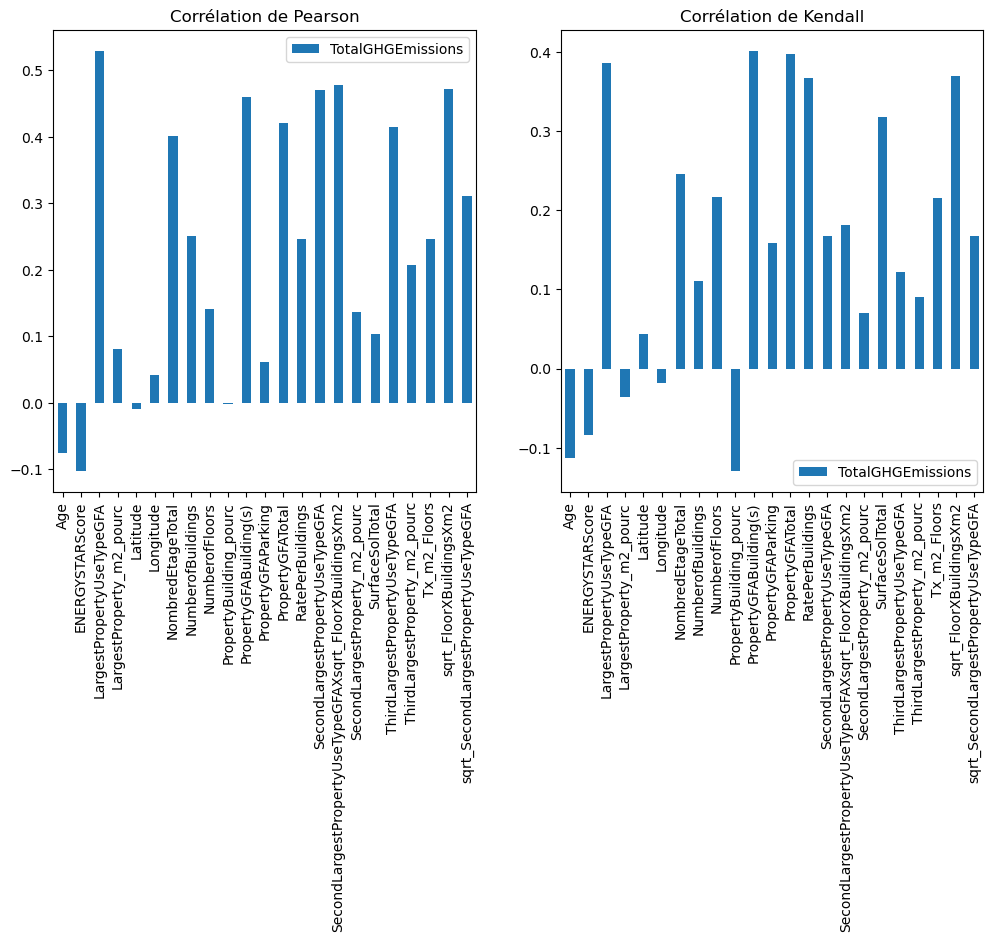

In [33]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(1, 2, 1)
df.corr()[['TotalGHGEmissions']].sort_index()\
.drop(['TotalGHGEmissions']).plot(kind='bar',ax = ax1)
ax1.set_title("Corrélation de Pearson")


ax2 = plt.subplot(1, 2, 2)
df.corr(method = 'kendall')[['TotalGHGEmissions']].sort_index()\
.drop(['TotalGHGEmissions']).plot(kind='bar',ax = ax2)
ax2.set_title("Corrélation de Kendall");

In [34]:
X_train.select_dtypes(exclude=[np.number]).columns

Index(['BuildingType', 'PrimaryPropertyType', 'ZipCode', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'FourthLargestPropertyUseType',
       'FifthLargestPropertyUseType', 'SixthLargestPropertyUseType', 'Age_bin',
       'PropertyGFAParking_bins'],
      dtype='object')

In [35]:
X_train.select_dtypes(include=[np.number]).columns

Index(['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'Age',
       'sqrt_SecondLargestPropertyUseTypeGFA', 'sqrt_FloorXBuildingsXm2',
       'SurfaceSolTotal', 'NombredEtageTotal',
       'SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2',
       'PropertyBuilding_pourc', 'Tx_m2_Floors', 'RatePerBuildings',
       'LargestProperty_m2_pourc', 'SecondLargestProperty_m2_pourc',
       'ThirdLargestProperty_m2_pourc'],
      dtype='object')

##### <font color='teal'>3.7.1 Scaling All DataSet Encoding cat Data and Numeric Data</font>

In [37]:
X_train_encod.describe()

,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,Age,sqrt_SecondLargestPropertyUseTypeGFA,sqrt_FloorXBuildingsXm2,SurfaceSolTotal,NombredEtageTotal,SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2,PropertyBuilding_pourc,Tx_m2_Floors,RatePerBuildings,LargestProperty_m2_pourc,SecondLargestProperty_m2_pourc,ThirdLargestProperty_m2_pourc,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,ZipCode_98102,ZipCode_98103,ZipCode_98104,ZipCode_98105,ZipCode_98106,ZipCode_98107,ZipCode_98108,ZipCode_98109,ZipCode_98112,ZipCode_98115,ZipCode_98116,ZipCode_98117,ZipCode_98118,ZipCode_98119,ZipCode_98121,ZipCode_98122,ZipCode_98125,ZipCode_98126,ZipCode_98133,ZipCode_98134,ZipCode_98144,ZipCode_98199,ZipCode_grouping,Neighborhood_central,Neighborhood_delridge,Neighborhood_downtown,Neighborhood_east,Neighborhood_greater duwamish,Neighborhood_lake union,Neighborhood_magnolia / queen anne,Neighborhood_north,Neighborhood_northeast,Neighborhood_northwest,Neighborhood_southeast,Neighborhood_southwest,LargestPropertyUseType_data center,LargestPropertyUseType_distribution center,LargestPropertyUseType_grouping,LargestPropertyUseType_hospital (general medical & surgical),LargestPropertyUseType_hotel,LargestPropertyUseType_k-12 school,LargestPropertyUseType_medical office,LargestPropertyUseType_multifamily housing,LargestPropertyUseType_non-refrigerated warehouse,LargestPropertyUseType_office,LargestPropertyUseType_other,LargestPropertyUseType_parking,LargestPropertyUseType_refrigerated warehouse,LargestPropertyUseType_residence hall/dormitory,LargestPropertyUseType_retail store,LargestPropertyUseType_senior care community,LargestPropertyUseType_supermarket/grocery store,LargestPropertyUseType_worship facility,SecondLargestPropertyUseType_data center,SecondLargestPropertyUseType_distribution center,SecondLargestPropertyUseType_grouping,SecondLargestPropertyUseType_k-12 school,SecondLargestPropertyUseType_laboratory,SecondLargestPropertyUseType_multifamily housing,SecondLargestPropertyUseType_non-refrigerated warehouse,SecondLargestPropertyUseType_office,SecondLargestPropertyUseType_other,SecondLargestPropertyUseType_other - recreation,SecondLargestPropertyUseType_other - services,SecondLargestPropertyUseType_parking,SecondLargestPropertyUseType_restaurant,SecondLargestPropertyUseType_retail store,SecondLargestPropertyUseType_supermarket/grocery store,SecondLargestPropertyUseType_swimming pool,SecondLargestPropertyUseType_void,ThirdLargestPropertyUseType_data center,ThirdLargestPropertyUseType_financial office,ThirdLargestPropertyUseType_fitness center/health club/gym,ThirdLargestPropertyUseType_food service,ThirdLargestPropertyUseType_grouping,ThirdLargestPropertyUseType_medical office,ThirdLargestPropertyUseType_multifamily housing,ThirdLargestPropertyUseType_non-refrigerated warehouse,ThirdLargestPropertyUseType_office,ThirdLargestPropertyUseType_other,ThirdLargestPropertyUseType_other - entertainment/public assembly,ThirdLargestPropertyUseType_other - restaurant/bar,ThirdLargestPropertyUseType_parking,ThirdLargestPropertyUseType_pre-school/daycare,ThirdLargestPropertyUseType_restaurant,ThirdLargestPropertyUseType_retail store,ThirdLargestPropertyUseType_social/meeting hal

In [38]:
from sklearn.preprocessing import StandardScaler # MinMaxScaler,Normalizer
Scaler_encod = StandardScaler().fit(X_train_encod)
X_train_encod_scaled = Scaler_encod.transform(X_train_encod)
X_test_encod_scaled = Scaler_encod.transform(X_test_encod)

##### <font color='teal'>3.7.1 Scaling All DataSet WHITOUT ENERGYSTARScore </font>

In [118]:
from sklearn.preprocessing import StandardScaler # MinMaxScaler,Normalizer
Scaler_encodWESS = StandardScaler().fit(X_train_encod.drop(columns=['ENERGYSTARScore']))
X_train_encod_scaledWESS = Scaler_encodWESS.transform( X_train_encod.drop(columns=['ENERGYSTARScore']) )
X_test_encod_scaledWESS = Scaler_encodWESS.transform( X_test_encod.drop(columns=['ENERGYSTARScore']) )

##### <font color='teal'>3.7.2 Scaling without encoding data</font>

In [39]:
from sklearn.preprocessing import StandardScaler # MinMaxScaler,Normalizer
ScalerWED = StandardScaler().fit(X_train.select_dtypes(include=[np.number]))
X_trainWED_scaled = ScalerWED.transform( X_train.select_dtypes(include=[np.number]) )
X_testWED_scaled = ScalerWED.transform( X_test.select_dtypes(include=[np.number]) )

##### <font color='teal'>3.7.3 Scaling Reduct DataSet</font>

##### <font color='teal'>Feature Selection</font>

<font color='green'> RFE : Élimination récursive des fonctionnalités </font>

In [40]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

min_features_to_select = 1  # Minimum number of features to consider
reg = RandomForestRegressor(max_depth=5)
#reg = LinearRegression()
cv = KFold(3)

rfecv = RFECV(
    estimator=reg,
    step=1,
    cv=cv,
    scoring="r2",
    min_features_to_select=min_features_to_select,
    n_jobs=11,
)
rfecv.fit(pd.DataFrame(X_train_encod_scaled,columns=Scaler_encod.feature_names_in_), y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 47
Wall time: 1min 11s


In [41]:
rfecv.get_feature_names_out()

array(['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'Age',
       'sqrt_SecondLargestPropertyUseTypeGFA', 'sqrt_FloorXBuildingsXm2',
       'SurfaceSolTotal', 'NombredEtageTotal',
       'SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2',
       'PropertyBuilding_pourc', 'Tx_m2_Floors', 'RatePerBuildings',
       'LargestProperty_m2_pourc', 'SecondLargestProperty_m2_pourc',
       'ThirdLargestProperty_m2_pourc', 'BuildingType_NonResidential',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Supermarket / Grocery Store', 'ZipCode_98104',
       'ZipCode_98112', 'ZipCode_98122', 'ZipCode_98126', 'ZipCode_98133',
       

In [42]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

min_features_to_select = 1  # Minimum number of features to consider
reg = GradientBoostingRegressor()

cv = KFold(3)

rfecvGB = RFECV(
    estimator=reg,
    step=1,
    cv=cv,
    scoring="r2",
    min_features_to_select=min_features_to_select,
    n_jobs=11,
)
rfecvGB.fit(pd.DataFrame(X_train_encod_scaled,columns=Scaler_encod.feature_names_in_), y_train)

print(f"Optimal number of features: {rfecvGB.n_features_}")

Optimal number of features: 51
Wall time: 48.4 s


In [43]:
rfecvGB.get_feature_names_out()

array(['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'Age',
       'sqrt_SecondLargestPropertyUseTypeGFA', 'sqrt_FloorXBuildingsXm2',
       'SurfaceSolTotal', 'NombredEtageTotal',
       'SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2',
       'PropertyBuilding_pourc', 'Tx_m2_Floors', 'RatePerBuildings',
       'LargestProperty_m2_pourc', 'SecondLargestProperty_m2_pourc',
       'ThirdLargestProperty_m2_pourc', 'PrimaryPropertyType_Hospital',
       'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_Warehouse', 'ZipCode_

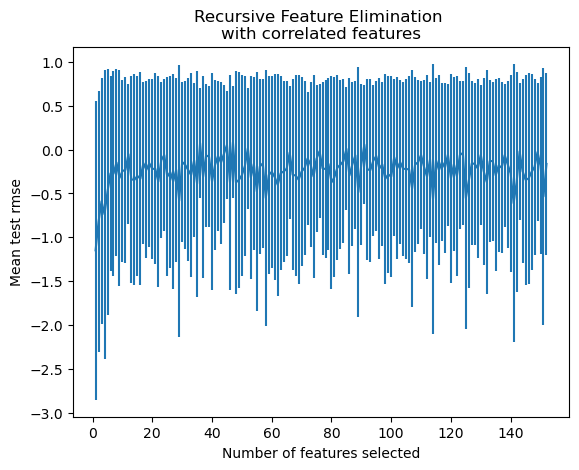

Wall time: 103 ms


In [44]:
%%time
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test rmse")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

#### <div class="alert alert-info"><font color='teal'> Liste des colonnes conservées</font></div>

In [45]:
col_cons = rfecv.get_feature_names_out()
#col_cons = rfecvGB.get_feature_names_out()
col_cons=col_cons.tolist()
col_cons

['Latitude',
 'Longitude',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'Age',
 'sqrt_SecondLargestPropertyUseTypeGFA',
 'sqrt_FloorXBuildingsXm2',
 'SurfaceSolTotal',
 'NombredEtageTotal',
 'SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2',
 'PropertyBuilding_pourc',
 'Tx_m2_Floors',
 'RatePerBuildings',
 'LargestProperty_m2_pourc',
 'SecondLargestProperty_m2_pourc',
 'ThirdLargestProperty_m2_pourc',
 'BuildingType_NonResidential',
 'PrimaryPropertyType_Hospital',
 'PrimaryPropertyType_Hotel',
 'PrimaryPropertyType_Large Office',
 'PrimaryPropertyType_Senior Care Community',
 'PrimaryPropertyType_Supermarket / Grocery Store',
 'ZipCode_98104',
 'ZipCode_98112',
 'ZipCode_98122',
 'ZipCode_98126',
 'ZipCode_98133',
 'Neighborhood_east',
 'Neighborhood_southwest',
 'LargestPropertyUseType_hosp

In [46]:
from sklearn.preprocessing import StandardScaler,RobustScaler # MinMaxScaler,Normalizer


X_train_reduct = X_train_encod[col_cons]
X_test_reduct = X_test_encod[col_cons]

ScalerReduct = RobustScaler().fit(X_train_reduct)
X_train_reduct_scaled = ScalerReduct.transform(X_train_reduct)
X_test_reduct_scaled = ScalerReduct.transform(X_test_reduct)

<hr>

</br>

# <a name="C4"><font color='green'>**Partie 4 : Modélisation**</font></a> 

### <a name="C41"><font color='green'>4.1 Dummy Estimator</font></a> 

In [47]:
warnings.filterwarnings(action='ignore')

#y numerique
naifMean = dummy.DummyRegressor(strategy='mean')
naifMedian = dummy.DummyRegressor(strategy='median')

meanNaifCV = cross_val_score(naifMean,X_train_reduct_scaled,y_train,scoring="neg_mean_squared_error")
medianNaifCV = cross_val_score(naifMedian,X_train_reduct_scaled,y_train,scoring="neg_mean_squared_error")

print( "Le score neg_mean_squared_error du DummyRegressor strategy 'mean' est {}".format(meanNaifCV.mean()))
print( "Le score neg_mean_squared_error du DummyRegressor strategy 'median' est {}".format( medianNaifCV.mean() ))

# print( "Le score r2 du {} est {}".format())

Le score neg_mean_squared_error du DummyRegressor strategy 'mean' est -950241.4961206962
Le score neg_mean_squared_error du DummyRegressor strategy 'median' est -970580.2652854349


### <a name="C42"><font color='green'>4.2 Model type Reducted </font></a> 

In [48]:
def compute_score(reg, X, y):
    xval = cross_val_score(reg, X, y, cv = 5,scoring='r2')
    return np.mean(xval)

In [49]:
import time
def compute_score_time(reg, X, y):
    # get starting time
    start = time.time()
    # compute r2 score
    xval = cross_val_score(reg, X, y, cv = 5,scoring='r2')
    # get the execution time
    elapsed_time_lc=(time.time()-start)
    return {'R2 score':round(np.mean(xval),5),'Time':elapsed_time_lc}

In [128]:
model_type_reducted = dict()

# y => np.log1p
model_type_reducted['LinearRegression'] = compute_score_time(LinearRegression(), X_train_reduct_scaled,np.log1p(y_train))
model_type_reducted['RandomForest'] = compute_score_time(RandomForestRegressor(), X_train_reduct_scaled,np.log1p(y_train))
model_type_reducted['Ridge'] = compute_score_time(Ridge(), X_train_reduct_scaled,np.log1p(y_train))
model_type_reducted['Lasso'] = compute_score_time(Lasso(), X_train_reduct_scaled,np.log1p(y_train))
model_type_reducted['ElasticNet'] = compute_score_time(ElasticNet(), X_train_reduct_scaled,np.log1p(y_train))
model_type_reducted['Bagging'] = compute_score_time(BaggingRegressor(), X_train_reduct_scaled,np.log1p(y_train))
model_type_reducted['AdaBoost'] = compute_score_time(AdaBoostRegressor(), X_train_reduct_scaled,np.log1p(y_train))
model_type_reducted['HistGradientBoosting'] = compute_score_time(HistGradientBoostingRegressor(), X_train_reduct_scaled,np.log1p(y_train))
model_type_reducted['GradientBoosting'] = compute_score_time(GradientBoostingRegressor(), X_train_reduct_scaled,np.log1p(y_train))
model_type_reducted['LightGBM'] = compute_score_time(LGBMRegressor(), X_train_reduct_scaled,np.log1p(y_train))
model_type_reducted['xgboost'] = compute_score_time(xgb.XGBRegressor(), X_train_reduct_scaled,np.log1p(y_train))
model_type_reducted['svr_linear'] = compute_score_time(LinearSVR(), X_train_reduct_scaled,np.log1p(y_train))
model_type_reducted['svr_sigmoid'] = compute_score_time(SVR(kernel='sigmoid'), X_train_reduct_scaled,np.log1p(y_train))
model_type_reducted['svr_rbf'] = compute_score_time(SVR(kernel='rbf'), X_train_reduct_scaled,np.log1p(y_train))

#y brute sans tranformation
model_type_reducted['svr_poly'] = compute_score_time(SVR(kernel='poly'), X_train_reduct_scaled,y_train)
model_type_reducted['kernel_ridge'] = compute_score_time(kernel_ridge.KernelRidge(), X_train_reduct_scaled,y_train)

In [129]:
model_type_reducted

{'LinearRegression': {'R2 score': 0.49981, 'Time': 0.011002540588378906},
 'RandomForest': {'R2 score': 0.55531, 'Time': 2.086984634399414},
 'Ridge': {'R2 score': 0.51477, 'Time': 0.0},
 'Lasso': {'R2 score': 0.14369, 'Time': 0.015617847442626953},
 'ElasticNet': {'R2 score': 0.23485, 'Time': 0.0},
 'Bagging': {'R2 score': 0.48421, 'Time': 0.2500159740447998},
 'AdaBoost': {'R2 score': 0.50395, 'Time': 0.46879005432128906},
 'HistGradientBoosting': {'R2 score': 0.55788, 'Time': 2.8418054580688477},
 'GradientBoosting': {'R2 score': 0.58931, 'Time': 0.8594417572021484},
 'LightGBM': {'R2 score': 0.55595, 'Time': 0.25000715255737305},
 'xgboost': {'R2 score': 0.52529, 'Time': 0.4687809944152832},
 'svr_linear': {'R2 score': -4.26794, 'Time': 0.12500882148742676},
 'svr_sigmoid': {'R2 score': -37.75954, 'Time': 0.09375667572021484},
 'svr_rbf': {'R2 score': 0.12743, 'Time': 0.10938191413879395},
 'svr_poly': {'R2 score': -0.07902, 'Time': 0.10938239097595215},
 'kernel_ridge': {'R2 score

In [130]:
# VotingRegressor
VotingRegressor_er = VotingRegressor([('gb', GradientBoostingRegressor()), 
                                      ('rf', RandomForestRegressor()), 
                                      ('LightGbm', LGBMRegressor()), 
                                      ('HistGBoost',HistGradientBoostingRegressor()), 
                                      ('xgb',xgb.XGBRFRegressor()),
                                      ('Ridge',Ridge())]
                                    )

model_type_reducted['VotingRegressor'] = compute_score_time(VotingRegressor_er, X_train_reduct_scaled,np.log1p(y_train))



# StackingRegressor
from sklearn.ensemble import StackingRegressor
estimators = [('gb', GradientBoostingRegressor()), 
              ('rf', RandomForestRegressor()), 
              ('LightGbm', LGBMRegressor()),
              ('HistGBoost',HistGradientBoostingRegressor()),
              ('xgb',xgb.XGBRFRegressor()),
              ('Ridge',Ridge())
             ]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=1000,max_depth=5,random_state=42)
)

model_type_reducted['StackingRegressor'] = compute_score_time(reg, X_train_reduct_scaled,np.log1p(y_train))

<AxesSubplot:>

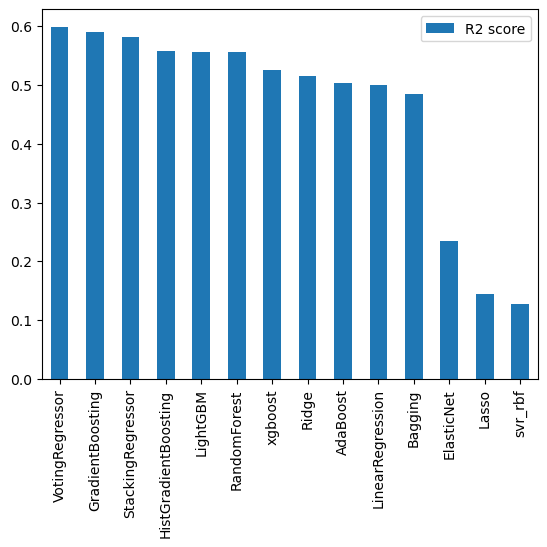

In [131]:
pd.DataFrame(model_type_reducted).T.sort_values(by=['R2 score'],ascending=False).head(14).drop(columns=['Time']).plot(kind="bar")

### <a name="C43"><font color='green'>4.3 Model type Whitout Encoding Data </font></a> 

In [132]:
model_type_Num = dict()

# y => np.log1p
model_type_Num['LinearRegression'] = compute_score_time(LinearRegression(), X_trainWED_scaled,np.log1p(y_train))
model_type_Num['RandomForest'] = compute_score_time(RandomForestRegressor(), X_trainWED_scaled,np.log1p(y_train))
model_type_Num['Ridge'] = compute_score_time(Ridge(), X_trainWED_scaled,np.log1p(y_train))
model_type_Num['Lasso'] = compute_score_time(Lasso(), X_trainWED_scaled,np.log1p(y_train))
model_type_Num['ElasticNet'] = compute_score_time(ElasticNet(), X_trainWED_scaled,np.log1p(y_train))
model_type_Num['Bagging'] = compute_score_time(BaggingRegressor(), X_trainWED_scaled,np.log1p(y_train))
model_type_Num['AdaBoost'] = compute_score_time(AdaBoostRegressor(), X_trainWED_scaled,np.log1p(y_train))
model_type_Num['HistGradientBoosting'] = compute_score_time(HistGradientBoostingRegressor(), X_trainWED_scaled,np.log1p(y_train))
model_type_Num['GradientBoosting'] = compute_score_time(GradientBoostingRegressor(), X_trainWED_scaled,np.log1p(y_train))
model_type_Num['LightGBM'] = compute_score_time(LGBMRegressor(), X_trainWED_scaled,np.log1p(y_train))
model_type_Num['xgboost'] = compute_score_time(xgb.XGBRegressor(), X_trainWED_scaled,np.log1p(y_train))
model_type_Num['svr_linear'] = compute_score_time(LinearSVR(), X_trainWED_scaled,np.log1p(y_train))
model_type_Num['svr_rbf'] = compute_score_time(SVR(kernel='rbf'), X_trainWED_scaled,np.log1p(y_train))

#y brute sans tranformation
model_type_Num['svr_poly'] = compute_score_time(SVR(kernel='poly'), X_trainWED_scaled,y_train)
model_type_Num['kernel_ridge'] = compute_score_time(kernel_ridge.KernelRidge(), X_trainWED_scaled,y_train)
model_type_Num['svr_sigmoid'] = compute_score_time(SVR(kernel='sigmoid'), X_trainWED_scaled,y_train)

In [133]:
model_type_Num

{'LinearRegression': {'R2 score': 0.40478, 'Time': 0.00800180435180664},
 'RandomForest': {'R2 score': 0.51022, 'Time': 1.7868518829345703},
 'Ridge': {'R2 score': 0.42428, 'Time': 0.015618085861206055},
 'Lasso': {'R2 score': -0.0035, 'Time': 0.0},
 'ElasticNet': {'R2 score': 0.13241, 'Time': 0.0},
 'Bagging': {'R2 score': 0.44441, 'Time': 0.20313739776611328},
 'AdaBoost': {'R2 score': 0.49322, 'Time': 0.43753814697265625},
 'HistGradientBoosting': {'R2 score': 0.48848, 'Time': 1.984497308731079},
 'GradientBoosting': {'R2 score': 0.5159, 'Time': 0.7969374656677246},
 'LightGBM': {'R2 score': 0.4949, 'Time': 0.21875500679016113},
 'xgboost': {'R2 score': 0.44552, 'Time': 0.4531548023223877},
 'svr_linear': {'R2 score': 0.39771, 'Time': 0.06250452995300293},
 'svr_rbf': {'R2 score': 0.43207, 'Time': 0.12500858306884766},
 'svr_poly': {'R2 score': 0.20627, 'Time': 0.07813048362731934},
 'kernel_ridge': {'R2 score': -0.52244, 'Time': 0.03125333786010742},
 'svr_sigmoid': {'R2 score': 0.

In [134]:
# VotingRegressor
VotingRegressor_er = VotingRegressor([('gb', GradientBoostingRegressor()), 
                                      ('rf', RandomForestRegressor()), 
                                      ('LightGbm', LGBMRegressor()), 
                                      ('AdaBoost', AdaBoostRegressor()),
                                      ('HistGBoost',HistGradientBoostingRegressor()), 
                                      ('xgb',xgb.XGBRFRegressor()),
                                      ('Ridge',Ridge())]
                                    )

model_type_Num['VotingRegressor'] = compute_score_time(VotingRegressor_er, X_trainWED_scaled,np.log1p(y_train))



# StackingRegressor
from sklearn.ensemble import StackingRegressor
estimators = [('gb', GradientBoostingRegressor()), 
              ('rf', RandomForestRegressor()), 
              ('LightGbm', LGBMRegressor()), 
              ('AdaBoost', AdaBoostRegressor()),
              ('HistGBoost',HistGradientBoostingRegressor()), 
              ('xgb',xgb.XGBRFRegressor()),
              ('Ridge',Ridge())]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=1000,max_depth=5,random_state=42)
)

model_type_Num['StackingRegressor'] = compute_score_time(reg, X_trainWED_scaled,np.log1p(y_train))

<AxesSubplot:>

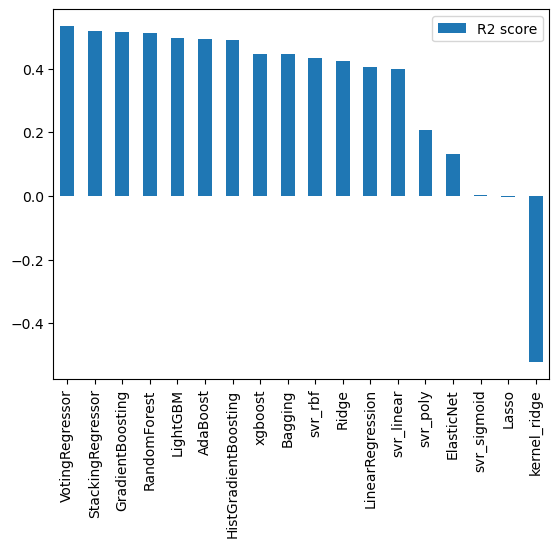

In [135]:
pd.DataFrame(model_type_Num).T.sort_values(by=['R2 score'],ascending=False).drop(columns=['Time']).plot(kind="bar")

### <a name="C44"><font color='green'>4.4 Model type All Data </font></a> 

In [136]:
model_type_All = dict()

# y => np.log1p
model_type_All['LinearRegression'] = compute_score_time(LinearRegression(), X_train_encod_scaled,np.log1p(y_train))
model_type_All['RandomForest'] = compute_score_time(RandomForestRegressor(), X_train_encod_scaled,np.log1p(y_train))
model_type_All['Ridge'] = compute_score_time(Ridge(), X_train_encod_scaled,np.log1p(y_train))
model_type_All['Lasso'] = compute_score_time(Lasso(), X_train_encod_scaled,np.log1p(y_train))
model_type_All['ElasticNet'] = compute_score_time(ElasticNet(), X_train_encod_scaled,np.log1p(y_train))
model_type_All['Bagging'] = compute_score_time(BaggingRegressor(), X_train_encod_scaled,np.log1p(y_train))
model_type_All['AdaBoost'] = compute_score_time(AdaBoostRegressor(), X_train_encod_scaled,np.log1p(y_train))
model_type_All['HistGradientBoosting'] = compute_score_time(HistGradientBoostingRegressor(), X_train_encod_scaled,np.log1p(y_train))
model_type_All['GradientBoosting'] = compute_score_time(GradientBoostingRegressor(), X_train_encod_scaled,np.log1p(y_train))
model_type_All['LightGBM'] = compute_score_time(LGBMRegressor(), X_train_encod_scaled,np.log1p(y_train))
model_type_All['xgboost'] = compute_score_time(xgb.XGBRegressor(), X_train_encod_scaled,np.log1p(y_train))
model_type_All['svr_linear'] = compute_score_time(LinearSVR(), X_train_encod_scaled,np.log1p(y_train))
model_type_All['svr_rbf'] = compute_score_time(SVR(kernel='rbf'), X_train_encod_scaled,np.log1p(y_train))
model_type_All['svr_sigmoid'] = compute_score_time(SVR(kernel='sigmoid'), X_train_encod_scaled,np.log1p(y_train))
model_type_All['kernel_ridge'] = compute_score_time(kernel_ridge.KernelRidge(), X_train_encod_scaled,np.log1p(y_train))
model_type_All['svr_poly'] = compute_score_time(SVR(kernel='poly'), X_train_encod_scaled,np.log1p(y_train))

#y brute sans tranformation
model_type_All

{'LinearRegression': {'R2 score': -1.7003790733835007e+26,
  'Time': 0.029006242752075195},
 'RandomForest': {'R2 score': 0.58758, 'Time': 2.8599631786346436},
 'Ridge': {'R2 score': 0.38432, 'Time': 0.015625953674316406},
 'Lasso': {'R2 score': -0.0035, 'Time': 0.0},
 'ElasticNet': {'R2 score': 0.13241, 'Time': 0.015618085861206055},
 'Bagging': {'R2 score': 0.55574, 'Time': 0.32814598083496094},
 'AdaBoost': {'R2 score': 0.53429, 'Time': 0.6250505447387695},
 'HistGradientBoosting': {'R2 score': 0.5925, 'Time': 6.4953835010528564},
 'GradientBoosting': {'R2 score': 0.62015, 'Time': 1.125075340270996},
 'LightGBM': {'R2 score': 0.59301, 'Time': 0.2968940734863281},
 'xgboost': {'R2 score': 0.57923, 'Time': 0.5469112396240234},
 'svr_linear': {'R2 score': -0.13837, 'Time': 0.5000426769256592},
 'svr_rbf': {'R2 score': 0.42643, 'Time': 0.15626049041748047},
 'svr_sigmoid': {'R2 score': -0.127, 'Time': 0.1250002384185791},
 'kernel_ridge': {'R2 score': -3923.30438, 'Time': 0.046877622604

In [137]:
# VotingRegressor
VotingRegressor_er = VotingRegressor([('gb', GradientBoostingRegressor()), 
                                      ('rf', RandomForestRegressor()), 
                                      ('LightGbm', LGBMRegressor()), 
                                      ('AdaBoost', AdaBoostRegressor()),
                                      ('HistGBoost',HistGradientBoostingRegressor()), 
                                      ('xgb',xgb.XGBRFRegressor()),
                                      ]
                                    )

model_type_All['VotingRegressor'] = compute_score_time(VotingRegressor_er, X_train_encod_scaled,np.log1p(y_train))



# StackingRegressor
from sklearn.ensemble import StackingRegressor
estimators = [('gb', GradientBoostingRegressor()), 
              ('rf', RandomForestRegressor()), 
              ('LightGbm', LGBMRegressor()), 
              ('AdaBoost', AdaBoostRegressor()),
              ('HistGBoost',HistGradientBoostingRegressor()), 
              ('xgb',xgb.XGBRFRegressor()),
              ]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=1000,max_depth=5,random_state=42)
)

model_type_All['StackingRegressor'] = compute_score_time(reg, X_train_encod_scaled,np.log1p(y_train))

<AxesSubplot:>

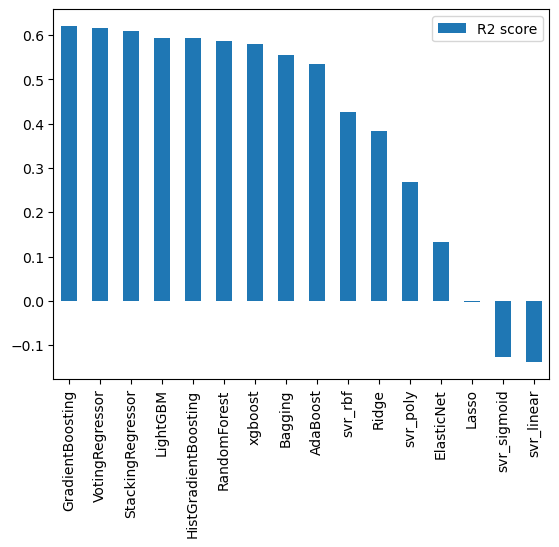

In [138]:
pd.DataFrame(model_type_All).T.sort_values(by=['R2 score'],ascending=False).iloc[:-2,:].drop(columns=['Time']).plot(kind="bar")

### <a name="C45"><font color='green'>4.5 Model type All Data Whitout ENERGIESTARScore </font></a> 

In [139]:
model_type_AllWESS = dict()

# y => np.log1p
model_type_AllWESS['LinearRegression'] = compute_score_time(LinearRegression(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['RandomForest'] = compute_score_time(RandomForestRegressor(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['Ridge'] = compute_score_time(Ridge(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['Lasso'] = compute_score_time(Lasso(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['ElasticNet'] = compute_score_time(ElasticNet(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['Bagging'] = compute_score_time(BaggingRegressor(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['AdaBoost'] = compute_score_time(AdaBoostRegressor(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['HistGradientBoosting'] = compute_score_time(HistGradientBoostingRegressor(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['GradientBoosting'] = compute_score_time(GradientBoostingRegressor(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['LightGBM'] = compute_score_time(LGBMRegressor(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['xgboost'] = compute_score_time(xgb.XGBRegressor(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['svr_linear'] = compute_score_time(LinearSVR(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['svr_rbf'] = compute_score_time(SVR(kernel='rbf'), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['svr_sigmoid'] = compute_score_time(SVR(kernel='sigmoid'), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['kernel_ridge'] = compute_score_time(kernel_ridge.KernelRidge(), X_train_encod_scaledWESS,np.log1p(y_train))
model_type_AllWESS['svr_poly'] = compute_score_time(SVR(kernel='poly'), X_train_encod_scaledWESS,np.log1p(y_train))

#y brute sans tranformation
model_type_AllWESS

{'LinearRegression': {'R2 score': -4.4149056599848325e+26,
  'Time': 0.030007600784301758},
 'RandomForest': {'R2 score': 0.55581, 'Time': 2.875377655029297},
 'Ridge': {'R2 score': 0.29398, 'Time': 0.015617847442626953},
 'Lasso': {'R2 score': -0.0035, 'Time': 0.0},
 'ElasticNet': {'R2 score': 0.13241, 'Time': 0.0},
 'Bagging': {'R2 score': 0.50585, 'Time': 0.3277859687805176},
 'AdaBoost': {'R2 score': 0.47953, 'Time': 0.5937981605529785},
 'HistGradientBoosting': {'R2 score': 0.52502, 'Time': 6.598299503326416},
 'GradientBoosting': {'R2 score': 0.56241, 'Time': 1.09383225440979},
 'LightGBM': {'R2 score': 0.52625, 'Time': 0.3125112056732178},
 'xgboost': {'R2 score': 0.52334, 'Time': 0.531285285949707},
 'svr_linear': {'R2 score': -0.13755, 'Time': 0.45316505432128906},
 'svr_rbf': {'R2 score': 0.39417, 'Time': 0.17188620567321777},
 'svr_sigmoid': {'R2 score': -0.13474, 'Time': 0.140625},
 'kernel_ridge': {'R2 score': -3924.63815, 'Time': 0.015628576278686523},
 'svr_poly': {'R2 s

In [140]:
# VotingRegressor
VotingRegressor_er = VotingRegressor([('gb', GradientBoostingRegressor()), 
                                      ('rf', RandomForestRegressor()), 
                                      ('LightGbm', LGBMRegressor()), 
                                      ('AdaBoost', AdaBoostRegressor()),
                                      ('HistGBoost',HistGradientBoostingRegressor()), 
                                      ('xgb',xgb.XGBRFRegressor()),
                                      ]
                                    )

model_type_AllWESS['VotingRegressor'] = compute_score_time(VotingRegressor_er, X_train_encod_scaledWESS,np.log1p(y_train))



# StackingRegressor
from sklearn.ensemble import StackingRegressor
estimators = [('gb', GradientBoostingRegressor()), 
              ('rf', RandomForestRegressor()), 
              ('LightGbm', LGBMRegressor()), 
              ('AdaBoost', AdaBoostRegressor()),
              ('HistGBoost',HistGradientBoostingRegressor()), 
              ('xgb',xgb.XGBRFRegressor()),
              ]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=1000,max_depth=5,random_state=42)
)

model_type_AllWESS['StackingRegressor'] = compute_score_time(reg, X_train_encod_scaledWESS,np.log1p(y_train))

<AxesSubplot:>

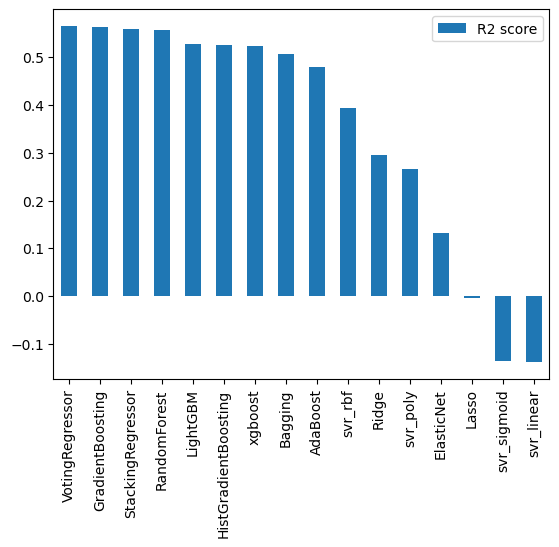

In [141]:
pd.DataFrame(model_type_AllWESS).T.sort_values(by=['R2 score'],ascending=False).iloc[:-2,:].drop(columns=['Time']).plot(kind="bar")

In [142]:
pd.DataFrame(model_type_reducted).T.rename(columns={'R2 score':'R2 score Reduct','Time':'Time Reduct'})\
.join(pd.DataFrame(model_type_Num).T.rename(columns={'R2 score':'R2 score Num','Time':'Time Num'}))\
.join(pd.DataFrame(model_type_All).T.rename(columns={'R2 score':'R2 score All','Time':'Time All'}))\
.join(pd.DataFrame(model_type_AllWESS).T.rename(columns={'R2 score':'R2 score AllWESS','Time':'Time AllWESS'}))

,R2 score Reduct,Time Reduct,R2 score Num,Time Num,R2 score All,Time All,R2 score AllWESS,Time AllWESS
LinearRegression,0.49981,0.011003,0.40478,0.008002,-1.700379e+26,0.029006,-4.414906e+26,0.030008
RandomForest,0.55531,2.086985,0.51022,1.786852,5.875800e-01,2.859963,5.558100e-01,2.875378
Ridge,0.51477,0.000000,0.42428,0.015618,3.843200e-01,0.015626,2.939800e-01,0.015618
Lasso,0.14369,0.015618,-0.00350,0.000000,-3.500000e-03,0.000000,-3.500000e-03,0.000000
ElasticNet,0.23485,0.000000,0.13241,0.000000,1.324100e-01,0.015618,1.324100e-01,0.000000
Bagging,0.48421,0.250016,0.44441,0.203137,5.557400e-01,0.328146,5.058500e-01,0.327786
AdaBoost,0.50395,0.468790,0.49322,0.437538,5.342900e-01,0.625051,4.795300e-01,0.593798
HistGradientBoosting,0.55788,2.841805,0.48848,1.984497,5.925000e-01,6.495384,5.250200e-01,6.598300
GradientBoosting,0.58931,0.859442,0.51590,0.796937,6.201500e-01,1.125075,5.624100e-01,1.093832
LightGBM,0.55595,0.250007,0.49490,0.218755,5.930100e-01,0.296894,5.262500e-01,0.312511


### <a name="C45"><font color='green'>4.5 Benchmark</font></a> 

In [143]:
# Init inner and outer loop
inner_cv = KFold(n_splits=3,shuffle=True,random_state=0)
outer_cv = KFold(n_splits=3,shuffle=True,random_state=1)

In [144]:
from sklearn.model_selection import cross_validate

def do_cross_validation_upgrade(clf,X,y, print_model=False):
    cv = cross_validate(clf, X, y, scoring=('r2', 'neg_mean_squared_error'), cv=outer_cv)
    
    scores_neg_mean_squared_error = ' + '.join(f'{s:.2f}' for s in cv["test_neg_mean_squared_error"])
    scores_r2 = ' + '.join(f'{s:.2f}' for s in cv["test_r2"])
    
    mean_r2 = cv["test_r2"].mean()
    mean_nRMSE = cv["test_neg_mean_squared_error"].mean()
    
    msg_r2 = f'Cross-validated r2: ({scores_r2}) / 3 = {mean_r2:.2f}'
    msg_nRMSE = f'Cross-validated rmse: ({scores_neg_mean_squared_error}) / 3 = {mean_nRMSE:.2f}'
    
    if print_model:
        msg_nRMSE = f'{clf}:\n\t{msg_nRMSE}\n'
        msg_r2 = f'{clf}:\n\t{msg_r2}\n'
    
    print(msg_nRMSE)
    print('\n')
    print(msg_r2)
    
def do_cross_validation(clf,X,y, print_model=False):
    cv = cross_validate(clf, X, y, scoring=('r2', 'neg_mean_squared_error'), cv=outer_cv)
    scores = ' + '.join(f'{s:.2f}' for s in cv["test_score"])
    mean_ = cv["test_score"].mean()
    msg = f'Cross-validated rmse: ({scores}) / 3 = {mean_:.2f}'
    
    if print_model:
        msg = f'{clf}:\n\t{msg}\n'
    
    print(msg)

<font color='red'> 4.3.0 Linear Model</font>

In [150]:
%%time
from sklearn.linear_model import LinearRegression

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
lm_grid = GridSearchCV(LinearRegression(n_jobs= 7), 
                       param_grid={'fit_intercept': [True,False],
                                   'positive' : [True,False]
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_root_mean_squared_error'
                      )
# random forest outer loop
print('Resultat y Brute:')
do_cross_validation_upgrade(lm_grid,X_train_encod_scaled, y_train, print_model=False)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(lm_grid,X_train_encod_scaled, np.log1p(y_train), print_model=False)

Resultat y Brute:
Cross-validated rmse: (-3373101856251506435043622912.00 + -5065176598200241293351521878016.00 + -44283179248717149253641699328.00) / 3 = -1704277626435069889738165977088.00


Cross-validated r2: (-1846227567375101198336.00 + -5576954696541504857440256.00 + -462497721799561162260480.00) / 3 = -2013766215302813983965184.00
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Resultat log1p(y):
Cross-validated rmse: (-6712494781800299626496.00 + -820249098567715772312846336.00 + -223.14) / 3 = -273418603687499188286783488.00


Cross-validated r2: (-3489814476713965912064.00 + -389453548042330738507382784.00 + -117.28) / 3 = -129819012618935826217172992.00
Wall time: 493 ms


In [151]:
res = lm_grid.fit(X_train_reduct_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'fit_intercept': True, 'positive': True}


In [153]:
%%time
from sklearn.linear_model import Ridge

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
Ridge_grid = GridSearchCV(Ridge(max_iter=20000), 
                       param_grid={'fit_intercept': [True,False],
                                   'alpha':[ 0.1,0.5,1,2,57,57.5,58],
                                   'solver':[ "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]
                                   
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_root_mean_squared_error'
                      )
# random forest outer loop
print('Resultat y Brute:')
do_cross_validation_upgrade(Ridge_grid,X_train_encod_scaled, y_train, print_model=False)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(Ridge_grid,X_train_encod_scaled, np.log1p(y_train), print_model=False)

Resultat y Brute:
Cross-validated rmse: (-1197254.77 + -369017.14 + -147534.81) / 3 = -571268.91


Cross-validated r2: (0.34 + 0.59 + -0.54) / 3 = 0.13
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Resultat log1p(y):
Cross-validated rmse: (-0.77 + -0.96 + -1.01) / 3 = -0.91


Cross-validated r2: (0.60 + 0.55 + 0.47) / 3 = 0.54
Wall time: 42.8 s


In [161]:
res = Ridge_grid.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'alpha': 58, 'fit_intercept': True, 'solver': 'sparse_cg'}


In [155]:
%%time
from sklearn.linear_model import Lasso

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
Lasso_grid = GridSearchCV(Lasso(max_iter=20000), 
                       param_grid={'fit_intercept': [True],
                                   'alpha':[0.01,0.02,0.03,0.1,0.2],
                                   'positive' : [False],
                                   'selection':['random']
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_root_mean_squared_error'
                      )
# random forest outer loop
print('Resultat y Brute:')
do_cross_validation_upgrade(Lasso_grid,X_train_encod_scaled, y_train, print_model=False)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(Lasso_grid,X_train_encod_scaled, np.log1p(y_train), print_model=False)

Resultat y Brute:
Cross-validated rmse: (-330038.87 + -1726293.07 + -461113.15) / 3 = -839148.36


Cross-validated r2: (0.82 + -0.90 + -3.82) / 3 = -1.30
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Resultat log1p(y):
Cross-validated rmse: (-0.72 + -0.91 + -0.96) / 3 = -0.86


Cross-validated r2: (0.62 + 0.57 + 0.49) / 3 = 0.56
Wall time: 20.7 s


In [160]:
res = Lasso_grid.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'alpha': 0.02, 'fit_intercept': True, 'positive': False, 'selection': 'random'}


In [156]:
%%time
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import quantile_transform

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
ElasticNet_grid = GridSearchCV(ElasticNet(max_iter=20000), 
                       param_grid={'fit_intercept': [True,False],
                                   'alpha':[0.001,0.1, 1.0, 10.0,20,50,100,500],
                                   'positive' : [True,False],
                                   'l1_ratio':[0,0.01,0.1,0.2,0.5,0.7,0.9,1],#L1 ratio =1 équivaut à un Lasso, 0 à un Ridge
                                   'selection':['cyclic', 'random']
                                  },
                       cv=inner_cv,n_jobs= -1,scoring='neg_root_mean_squared_error'
                      )
# random forest outer loop
print('Resultat y Brute:')
do_cross_validation_upgrade(ElasticNet_grid,X_train_encod_scaled, y_train, print_model=False)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(ElasticNet_grid,X_train_encod_scaled, np.log1p(y_train), print_model=False)

Resultat y Brute:
Cross-validated rmse: (-932101.27 + -575684.59 + -119613.58) / 3 = -542466.48


Cross-validated r2: (0.49 + 0.37 + -0.25) / 3 = 0.20
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Resultat log1p(y):
Cross-validated rmse: (-0.74 + -0.92 + -0.99) / 3 = -0.88


Cross-validated r2: (0.62 + 0.56 + 0.48) / 3 = 0.55
Wall time: 3min 23s


In [159]:
res = ElasticNet_grid.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.2, 'positive': False, 'selection': 'cyclic'}


<font color='red'> 4.3.1. RandomForestRegressor</font>

In [158]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [164]:
%%time
from sklearn.ensemble import RandomForestRegressor

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
rf_grid = GridSearchCV(RandomForestRegressor(random_state=0), 
                       param_grid={'n_estimators': [100,250,500],
                                   'criterion' : ['squared_error', 'absolute_error'],
                                   'max_depth' : [None,3,5,10],
                                   'max_features' : [1.0,'auto', 'sqrt', 'log2',int(X_train_encod_scaled.shape[1]/3)],
                                  },
                       cv=inner_cv,n_jobs= 11,scoring='neg_root_mean_squared_error'
                      )
# random forest outer loop
print('Resultat y Brute:')
do_cross_validation_upgrade(rf_grid,X_train_reduct_scaled, y_train, print_model=False)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(rf_grid,X_train_reduct_scaled, np.log1p(y_train), print_model=False)

Resultat y Brute:
Cross-validated rmse: (-1126223.83 + -260979.25 + -124457.18) / 3 = -503886.75


Cross-validated r2: (0.38 + 0.71 + -0.30) / 3 = 0.27
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Resultat log1p(y):
Cross-validated rmse: (-0.86 + -0.88 + -1.04) / 3 = -0.93


Cross-validated r2: (0.55 + 0.58 + 0.45) / 3 = 0.53
Wall time: 7min 18s


In [165]:
res = rf_grid.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'n_estimators': 100}


<font color='red'>4.3.2. BaggingRegressor</font>

In [166]:
%%time
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor

###### BaggingRegressor inner loop
bagg_grid = GridSearchCV(BaggingRegressor(random_state=0,n_jobs = 2,oob_score=False),
                         param_grid={'n_estimators': [1500,1700,2000]},
                         cv=inner_cv,n_jobs= 5,scoring='neg_root_mean_squared_error')
# BaggingRegressor outer loop
print('Resultat y Brute:')
do_cross_validation_upgrade(bagg_grid,X_train_encod_scaled, y_train, print_model=True)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(bagg_grid,X_train_encod_scaled, np.log1p(y_train), print_model=True)

Resultat y Brute:
GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=BaggingRegressor(n_jobs=2, random_state=0), n_jobs=5,
             param_grid={'n_estimators': [1500, 1700, 2000]},
             scoring='neg_root_mean_squared_error'):
	Cross-validated rmse: (-1105101.28 + -330271.11 + -66134.27) / 3 = -500502.22



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=BaggingRegressor(n_jobs=2, random_state=0), n_jobs=5,
             param_grid={'n_estimators': [1500, 1700, 2000]},
             scoring='neg_root_mean_squared_error'):
	Cross-validated r2: (0.40 + 0.64 + 0.31) / 3 = 0.45

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Resultat log1p(y):
GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=BaggingRegressor(n_jobs=2, random_state=0), n_jobs=5,
             param_grid={'n_estimators': [1500

In [167]:
res = bagg_grid.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'n_estimators': 2000}


<font color='red'>4.3.3.AdaBoostRegressor</font>

In [168]:
%%time
from sklearn.ensemble import AdaBoostRegressor

###### AdaBoostRegressor inner loop
Ada_grid = GridSearchCV(AdaBoostRegressor(random_state=0), 
                         param_grid={'n_estimators': [5,50,100,200, 500,2000],
                                    "loss":["linear", "square", "exponential"],
                                     'learning_rate': [0.01,0.1,0.2,0.5,1]
                                    },cv=inner_cv,n_jobs= 11,scoring='neg_root_mean_squared_error')
                        
# AdaBoostRegressor outer loop
print('Resultat y Brute:')
do_cross_validation_upgrade(Ada_grid,X_train_encod_scaled, y_train, print_model=True)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(Ada_grid,X_train_encod_scaled, np.log1p(y_train), print_model=True)

Resultat y Brute:
GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostRegressor(random_state=0), n_jobs=11,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [5, 50, 100, 200, 500, 2000]},
             scoring='neg_root_mean_squared_error'):
	Cross-validated rmse: (-1073669.37 + -547063.68 + -78767.90) / 3 = -566500.32



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostRegressor(random_state=0), n_jobs=11,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [5, 50, 100, 200, 500, 2000]},
             scoring='neg_root_mean_squared_error'):
	Cross-validated r2: (0.41 + 0.40 + 0.18) / 3 = 0.33

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_

In [169]:
res = Ada_grid.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 2000}


<font color='red'>4.3.4. Support Vector Machine Regressor RBF</font>

In [170]:
%%time
from sklearn.svm import SVR
from sklearn.preprocessing import quantile_transform

gamma_to_test = np.logspace(-1,1,5)
params_grid_rbf = { 'gamma': gamma_to_test,
                  'C' : [0.2, 0.5, 1.0, 5,14.5, 20]
                  }

###### svc inner loop
svr_rbf_grid = GridSearchCV(estimator=SVR(kernel='rbf'), 
                      param_grid = params_grid_rbf,
                      cv=inner_cv, 
                      n_jobs=4,scoring='neg_root_mean_squared_error')
# svc outer loop
do_cross_validation_upgrade(svr_rbf_grid,X_train_encod_scaled, y_train, print_model=True)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(svr_rbf_grid,X_train_encod_scaled, np.log1p(y_train), print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(), n_jobs=4,
             param_grid={'C': [0.2, 0.5, 1.0, 5, 14.5, 20],
                         'gamma': array([ 0.1       ,  0.31622777,  1.        ,  3.16227766, 10.        ])},
             scoring='neg_root_mean_squared_error'):
	Cross-validated rmse: (-1869504.90 + -931480.15 + -102033.96) / 3 = -967673.01



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(), n_jobs=4,
             param_grid={'C': [0.2, 0.5, 1.0, 5, 14.5, 20],
                         'gamma': array([ 0.1       ,  0.31622777,  1.        ,  3.16227766, 10.        ])},
             scoring='neg_root_mean_squared_error'):
	Cross-validated r2: (-0.02 + -0.03 + -0.07) / 3 = -0.04

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Resultat log1p(y):
GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=Tru

In [171]:
res = svr_rbf_grid.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'C': 5, 'gamma': 0.1}


<font color='red'>4.3.5. Support Vector Machine Regressor sigmoid</font>

In [172]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-100,300,6)
params_grid_sigmoid = {
    'coef0':[0,0.5,500],
    'gamma': gamma_to_test
}

###### svc inner loop
svr_sigmoid_grid = GridSearchCV(estimator=SVR(kernel='sigmoid'), 
                      param_grid=params_grid_sigmoid,
                      cv=inner_cv, 
                      n_jobs = 7 ,scoring='neg_root_mean_squared_error')
# svc outer loop
do_cross_validation_upgrade(svr_sigmoid_grid,X_train_encod_scaled, y_train, print_model=True)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(svr_sigmoid_grid,X_train_encod_scaled, np.log1p(y_train), print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='sigmoid'), n_jobs=7,
             param_grid={'coef0': [0, 0.5, 500],
                         'gamma': array([1.e-100, 1.e-020, 1.e+060, 1.e+140, 1.e+220, 1.e+300])},
             scoring='neg_root_mean_squared_error'):
	Cross-validated rmse: (-1839257.64 + -905606.63 + -92130.79) / 3 = -945665.02



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='sigmoid'), n_jobs=7,
             param_grid={'coef0': [0, 0.5, 500],
                         'gamma': array([1.e-100, 1.e-020, 1.e+060, 1.e+140, 1.e+220, 1.e+300])},
             scoring='neg_root_mean_squared_error'):
	Cross-validated r2: (-0.01 + 0.00 + 0.04) / 3 = 0.01

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Resultat log1p(y):
GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
            

In [173]:
res = svr_sigmoid_grid.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'coef0': 0.5, 'gamma': 1e-100}


<font color='red'>4.3.6. Support Vector Machine Regressor linear</font>

In [174]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-4,4,10)
params_grid_linear = { 'C':[0, 0.01, 0.1, 0.5,1,2] }

###### svc inner loop
svr_rbf_linear = GridSearchCV(estimator=SVR(kernel='linear'), 
                      param_grid=params_grid_linear,
                      cv=inner_cv, 
                      n_jobs=11,scoring='neg_root_mean_squared_error')
# svc outer loop
do_cross_validation_upgrade(svr_rbf_linear,X_train_encod_scaled, y_train, print_model=True)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(svr_rbf_linear,X_train_encod_scaled, np.log1p(y_train), print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='linear'), n_jobs=11,
             param_grid={'C': [0, 0.01, 0.1, 0.5, 1, 2]},
             scoring='neg_root_mean_squared_error'):
	Cross-validated rmse: (-1512852.24 + -539255.32 + -68457.57) / 3 = -706855.05



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='linear'), n_jobs=11,
             param_grid={'C': [0, 0.01, 0.1, 0.5, 1, 2]},
             scoring='neg_root_mean_squared_error'):
	Cross-validated r2: (0.17 + 0.41 + 0.29) / 3 = 0.29

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Resultat log1p(y):
GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='linear'), n_jobs=11,
             param_grid={'C': [0, 0.01, 0.1, 0.5, 1, 2]},
             scoring='neg_root_mean_squared_error'):
	Cross-validated rmse: (

In [175]:
res = svr_rbf_linear.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'C': 0.01}


<font color='red'>4.3.6. Support Vector Machine Regressor poly</font>

In [176]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-3,3,5)
params_grid_poly = { 'C':[0.5,1,2],
                     'degree': [0.5,2,3,5],
                     'coef0':[0,1,5]
                     }

###### svc inner loop
svr_rbf_poly = GridSearchCV(estimator=SVR(kernel='poly'), 
                      param_grid=params_grid_linear,
                      cv=inner_cv, 
                      n_jobs=7,scoring='neg_root_mean_squared_error')
# svc outer loop
do_cross_validation_upgrade(svr_rbf_poly,X_train_encod_scaled, y_train, print_model=True)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(svr_rbf_poly,X_train_encod_scaled, np.log1p(y_train), print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='poly'), n_jobs=7,
             param_grid={'C': [0, 0.01, 0.1, 0.5, 1, 2]},
             scoring='neg_root_mean_squared_error'):
	Cross-validated rmse: (-1800266.69 + -856699.70 + -98849.22) / 3 = -918605.20



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='poly'), n_jobs=7,
             param_grid={'C': [0, 0.01, 0.1, 0.5, 1, 2]},
             scoring='neg_root_mean_squared_error'):
	Cross-validated r2: (0.01 + 0.06 + -0.03) / 3 = 0.01

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Resultat log1p(y):
GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVR(kernel='poly'), n_jobs=7,
             param_grid={'C': [0, 0.01, 0.1, 0.5, 1, 2]},
             scoring='neg_root_mean_squared_error'):
	Cross-validated rmse: (-1.20 + 

In [177]:
res = svr_rbf_poly.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'C': 2}


<font color='red'>4.3.7. Gradient Boosting Regressor </font>

In [178]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

params_grid_gb = {'n_estimators': [5,100,200, 500],
                  'loss' : ['squared_error', 'absolute_error', 'huber'],
                  'learning_rate' : [0.1,0.2,0.5,1],
                 }

###### Gradient Boosting Regressor inner loop
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=0), 
                       param_grid = params_grid_gb,
                       cv=inner_cv, 
                       n_jobs=4,
                       scoring='neg_root_mean_squared_error')

# Gradient Boosting Regressor outer loop
do_cross_validation_upgrade(gb_grid,X_train_encod_scaled, y_train, print_model=True)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(gb_grid,X_train_encod_scaled, np.log1p(y_train), print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=0), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber'],
                         'n_estimators': [5, 100, 200, 500]},
             scoring='neg_root_mean_squared_error'):
	Cross-validated rmse: (-1277094.94 + -652246.27 + -51422.68) / 3 = -660254.63



GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=0), n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'loss': ['squared_error', 'absolute_error', 'huber'],
                         'n_estimators': [5, 100, 200, 500]},
             scoring='neg_root_mean_squared_error'):
	Cross-validated r2: (0.30 + 0.28 + 0.46) / 3 = 0.35

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-

In [179]:
res = gb_grid.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}


<font color='red'>4.3.8. XGBoost Regressor </font>

In [180]:
%%time
# https://xgboost.readthedocs.io/en/latest/parameter.html
import xgboost as xgb
from sklearn.metrics import mean_squared_error

params_grid_xgboost =  {'max_depth': [2,3, 4],
                        'n_estimators': [50, 100],
                        'objective' :['reg:squarederror','reg:pseudohubererror','reg:gamma'], 
                        'learning_rate' : [0.1,0.2,0.5,0.9],
                        'alpha' : [0,0.1,0.2,1,5,10]
                       }
###### xgboost inner loop
xgboost_grid = GridSearchCV(estimator = xgb.XGBRegressor(), 
                            param_grid = params_grid_xgboost,
                            #early_stopping_rounds=10,
                            n_jobs=7,scoring='neg_root_mean_squared_error',
                            cv=inner_cv)
# xgboost outer loop
do_cross_validation_upgrade(xgboost_grid,X_train_encod_scaled, y_train, print_model=True)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(xgboost_grid,X_train_encod_scaled, np.log1p(y_train), print_model=True)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=7,
          

In [181]:
res = xgboost_grid.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror'}


<font color='red'>4.3.9. Artificial Neural Network </font>

In [ ]:
X_train_encod_scaled.shape

In [ ]:
y_train.shape

In [182]:
%%time
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

#Nous allons créer notre premier réseau de neurones. 

# earlystopping
es = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

#inputshape
#p_input = X_train_encod_scaled.shape[1]
p_input = X_train_encod_scaled.shape[1]

def initialize_model():
    
    #Nous utilisons la fonction Sequential() qui est approprié pour notre problème. Nous ne développerons pas ici mais
    #vous pouvez vous référer à la documentation de la bibliothèque Keras: https://keras.io/guides/sequential_model/
    model = models.Sequential()
    #On indique à notre modèle la dimension des données d'entrées qui correspond au nombre de colonnes de X_train
    model.add(keras.Input(shape=(p_input)))  #16
    
    
    model.add(layers.Dense(200, input_dim=2, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(80, input_dim=2, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(40, input_dim=2, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    #Nous ajoutons une seconde couche car nous sommes dans un problème non linéaire comme dit dans le cours
    model.add(layers.Dense(1))
    
    #Ici, nous pouvons ajouter des paramètres à notre modèle. Il faut juste retenir que "accuracy" permet d'avoir
    #la précision de notre modèle et est particulièrement indiqué pour les problèmes de classification. 
    model.compile(metrics=[keras.metrics.RootMeanSquaredError()],
                  loss='mse',
                  optimizer='adam')
    
    return model

model = initialize_model()

seqModel = model.fit(
    #x=X_train_reduct_scaled, #r2 : 0.50
    x=X_train_encod_scaled, #r2 : 0.50
    y=np.log1p(y_train),
    validation_data=(X_test_encod_scaled,np.log1p(y_test.values)),
    batch_size=128,epochs=10000,callbacks=[es])

Epoch 1/10000
6/6 [==============================] - 0s 24ms/step - loss: 14.2862 - root_mean_squared_error: 3.7797 - val_loss: 5.4751 - val_root_mean_squared_error: 2.3399
Epoch 2/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.2917 - root_mean_squared_error: 2.3004 - val_loss: 3.1630 - val_root_mean_squared_error: 1.7785
Epoch 3/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.7267 - root_mean_squared_error: 2.1741 - val_loss: 2.5705 - val_root_mean_squared_error: 1.6033
Epoch 4/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.4520 - root_mean_squared_error: 1.8580 - val_loss: 2.3640 - val_root_mean_squared_error: 1.5375
Epoch 5/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.0231 - root_mean_squared_error: 1.7387 - val_loss: 2.2752 - val_root_mean_squared_error: 1.5084
Epoch 6/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.4647 - root_mean_squared_error: 1.5699 - val_loss: 1.8579 - val_root

In [183]:
predictions = model.predict(X_test_encod_scaled)#X_test_reduct_scaled
np.sqrt(mean_squared_error(y_test,predictions))

560.5503594853274

In [190]:
from sklearn.metrics import r2_score
r2_score(np.log1p(y_test),predictions)

0.4837760296583373

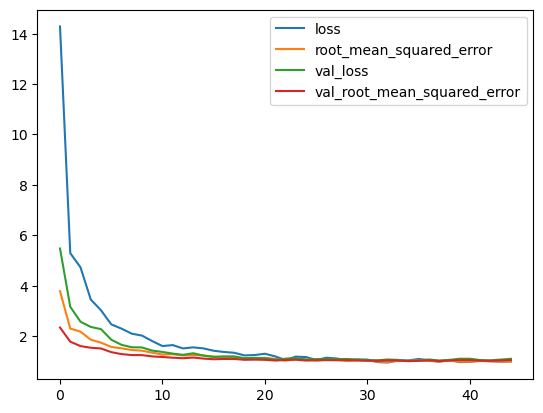

In [185]:
losses = pd.DataFrame(seqModel.history)
losses.plot();

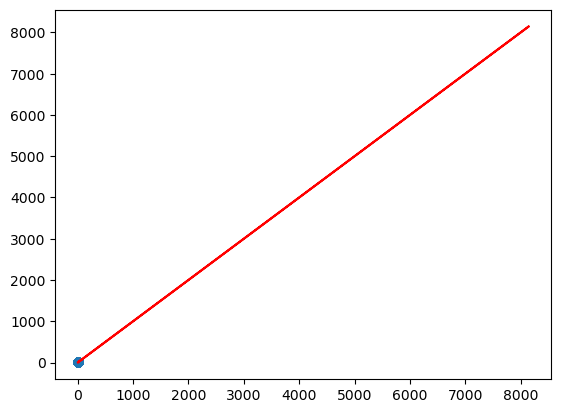

In [191]:
# Nos prédictions
plt.scatter(np.log1p(y_test),predictions)
# Prédictions parfaites
plt.plot(y_test,y_test,'r');

<font color='red'>4.3.10. kernel_ridge </font>

In [187]:
%%time
from sklearn import kernel_ridge

###### kernel_ridge inner loop
kernel_ridge_grid = GridSearchCV(kernel_ridge.KernelRidge(), 
                                 param_grid={'alpha':[0.1,0.2,0.5,1,2,3,4], # valeur par défaut 
                                             'kernel':['rbf','polynomial','linear'], # noyau Gaussien
                                             'degree':[1,2,3],
                                             'gamma':[0.01,0.2,0.5,1,3,5],
                                             
                                            },n_jobs=7,scoring='neg_root_mean_squared_error'
                                )

# random kernel_ridge loop
print('Resultat y Brute:')
do_cross_validation_upgrade(kernel_ridge_grid,X_train_encod_scaled, y_train, print_model=True)
print('_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print('Resultat log1p(y):')
do_cross_validation_upgrade(kernel_ridge_grid,X_train_encod_scaled, np.log1p(y_train), print_model=True)

Resultat y Brute:
GridSearchCV(estimator=KernelRidge(), n_jobs=7,
             param_grid={'alpha': [0.1, 0.2, 0.5, 1, 2, 3, 4],
                         'degree': [1, 2, 3],
                         'gamma': [0.01, 0.2, 0.5, 1, 3, 5],
                         'kernel': ['rbf', 'polynomial', 'linear']},
             scoring='neg_root_mean_squared_error'):
	Cross-validated rmse: (-1187405.44 + -131399.47 + -54640.34) / 3 = -457815.09



GridSearchCV(estimator=KernelRidge(), n_jobs=7,
             param_grid={'alpha': [0.1, 0.2, 0.5, 1, 2, 3, 4],
                         'degree': [1, 2, 3],
                         'gamma': [0.01, 0.2, 0.5, 1, 3, 5],
                         'kernel': ['rbf', 'polynomial', 'linear']},
             scoring='neg_root_mean_squared_error'):
	Cross-validated r2: (0.35 + 0.86 + 0.43) / 3 = 0.54

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-__-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
Resultat log1p(y):
GridSearchCV(estimator

In [188]:
res = kernel_ridge_grid.fit(X_train_encod_scaled, np.log1p(y_train))
# Print the model parameters of the best model
print(res.best_params_)

{'alpha': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'polynomial'}


#### <div class="alert alert-info"><font color='teal'> Meilleur model </font></div>

### <font color='green'>4.2.1 modelisation with best params </font>

In [193]:
xgboost_grid.fit(X_train_encod_scaled, np.log1p(y_train) )

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=7,
             param_grid={'alpha': [0, 0.1, 0.2, 1, 5, 10],
                         'learning_rate': [0.1, 0.2, 0.5, 0.9],
                         'max_depth': [2, 3, 4], 'n_estimators': [50, 100],
                         'objective': ['reg:squarederror',
                                       'reg:pseudohubererror', 'reg:gamma']},
             scoring='neg_root_mean_squared_error')

In [194]:
print('Les meilleurs paramètres retenus ',xgboost_grid.best_params_)

Les meilleurs paramètres retenus  {'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror'}


In [196]:
bestxgb = xgb.XGBRegressor(**xgboost_grid.best_params_)
bestxgb.fit(X=X_train_encod_scaled,y=np.log1p(y_train))

XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.100000001, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

<BarContainer object of 152 artists>

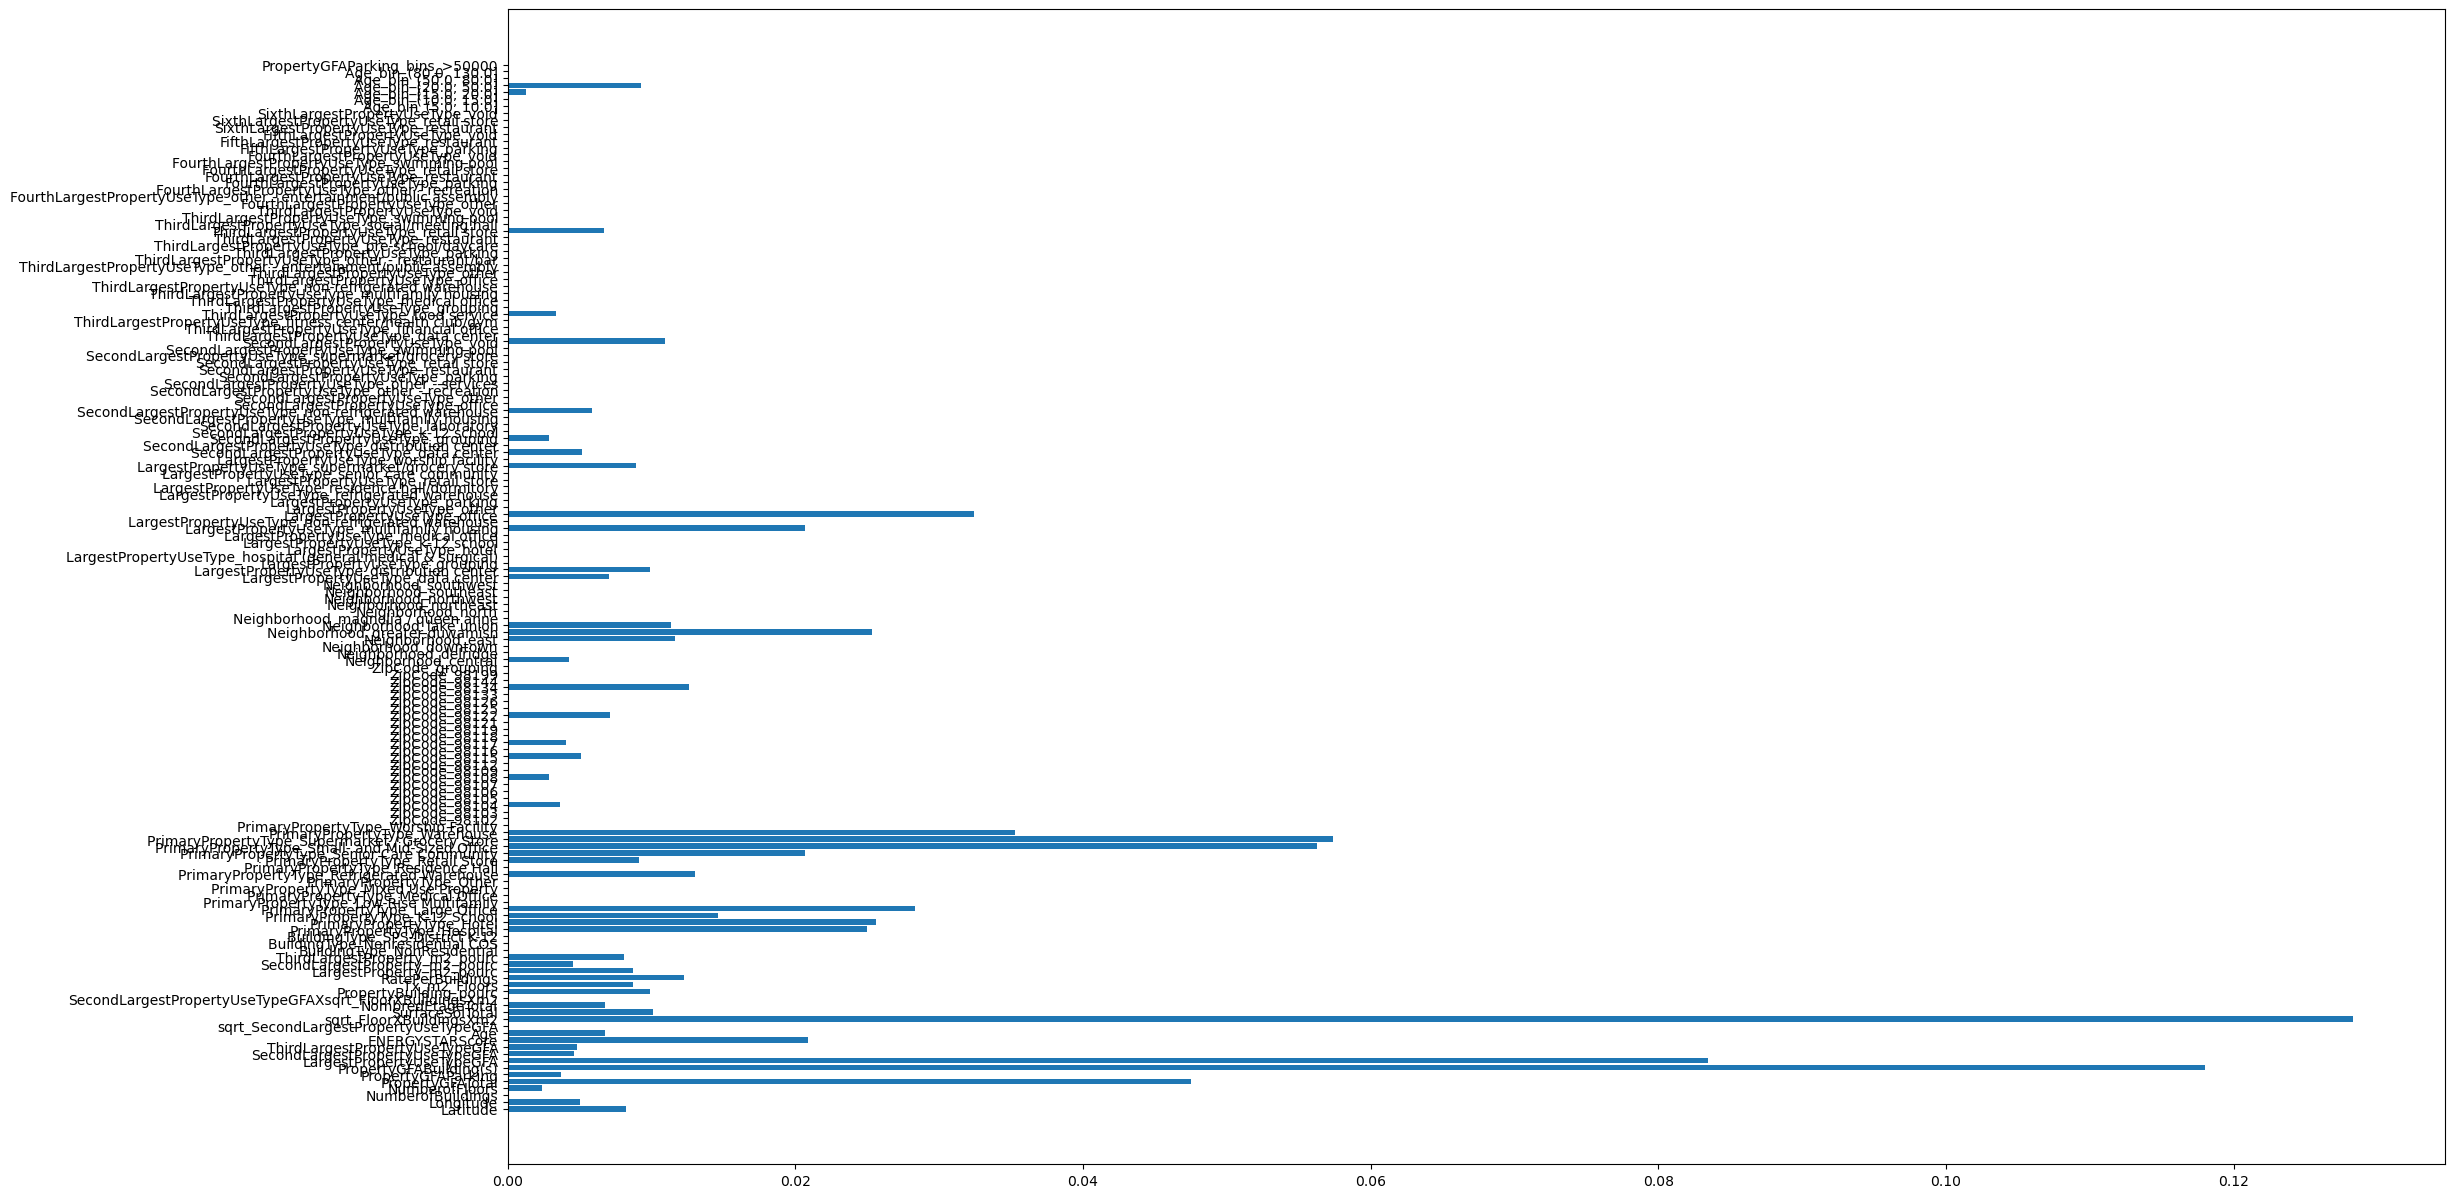

In [209]:
plt.figure(figsize=(25,15))
plt.barh(Scaler_encod.feature_names_in_, bestxgb.feature_importances_ )


In [208]:
Scaler_encod.feature_names_in_[bestxgb.feature_importances_<0.01]

array(['Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'Age',
       'sqrt_SecondLargestPropertyUseTypeGFA', 'NombredEtageTotal',
       'SecondLargestPropertyUseTypeGFAXsqrt_FloorXBuildingsXm2',
       'PropertyBuilding_pourc', 'Tx_m2_Floors',
       'LargestProperty_m2_pourc', 'SecondLargestProperty_m2_pourc',
       'ThirdLargestProperty_m2_pourc', 'BuildingType_NonResidential',
       'BuildingType_Nonresidential COS',
       'BuildingType_SPS-District K-12',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property',
       'PrimaryPropertyType_Other', 'PrimaryPropertyType_Residence Hall',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Worship Facility', 'ZipCode_98102',
       'ZipCode_98103', 'ZipCode_98104', 'ZipCode_98105', 'ZipCode_98106',
       'Zi

In [ ]:
###################  Feature Importance  ###################
# cf https://mljar.com/blog/feature-importance-in-random-forest/
import time
import numpy as np

start_time = time.time()
importances = bestxgb.feature_importances_
std = np.std([tree.feature_importances_ for tree in bestRF.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

plt.figure(figsize = (12,12))
plt.barh(Scaler.feature_names_in_, bestRF.feature_importances_);

In [ ]:
### merge modalité low imporatnce

In [ ]:
result = pd.DataFrame(bestRF.feature_importances_,index=Scaler.feature_names_in_,
             columns=['Importance'])\
.sort_values(by ='Importance', ascending=False).reset_index()

result.rename({'index': 'Colonnes'}, axis='columns',inplace=True)

In [ ]:
result.head(20)

#### mean Importance group by categorical variable

In [ ]:
result['group_col'] = result.Colonnes.str.split('_',expand=True).iloc[:,0]
result = result.merge(right=result.groupby(['group_col']).size().reset_index(),
                                on = 'group_col').rename({0:'n_group'}, axis='columns')

In [ ]:
result

In [ ]:
result.loc[result.n_group!=1].sort_values(by=['group_col','Importance'],ascending=[False,False])

In [ ]:
pd.options.display.float_format = '{:.2%}'.format
result_agg = result.groupby(['group_col']).agg({'Importance': ["min","mean","max","std"]}).round(4)
result_agg.sort_values(by=[('Importance',  'max')],ascending=False)

In [ ]:
pd.reset_option('^display.', silent=True)

In [ ]:
result_agg.loc[~result_agg.Importance["std"].isna()].plot(kind = 'bar')

In [ ]:
# les colonnes BuildingType, Neighborhood, ZipCode, Longitude, Latitude, Age, PropertyGFAParking ne sont pas importantes

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor( #max_features=p/3 #{“sqrt”, “log2”, None}, int or float, default=”sqrt”
                                 )

p = X_train_encod.shape[1]#nombre de variable

inner_cv = KFold(n_splits=5,shuffle=True,random_state=0)
outer_cv = KFold(n_splits=5,shuffle=True,random_state=1)

#parametre à tester
params_grid = {
    'n_estimators':[100,200,500], # A modifier
    'max_features':['sqrt', 'log2']
}

# Boucle interne
model = GridSearchCV(estimator = estimator, 
                      param_grid=params_grid,
                      cv=inner_cv, 
                      n_jobs=4,
                      scoring='neg_mean_squared_error') #'accuracy' si y est categorielle


# Boucle externe
nested_score = cross_val_score(model,
                               X=X_train_encod_scaled,
                               y=y_train,
                               cv=outer_cv,
                               n_jobs=1,
                               scoring='neg_mean_squared_error')#'accuracy' si y est categorielle

nested_score.mean()

#model2.fit(X_train_scaled,y_train)
#non_nested_score = model2.best_score_

##### <font color='green'>  Résultat des differents tests effectué </font>

|Encodage|Passage au log|ENERYSCORE|Resultat R2|
|-----|-----|-----|-----|
avec|sans|sans|56,54%|
avec|sans|avec|63,33%|
avec|avec|avec|42,34%|
avec|avec|sans|46,58%|
sans|sans|sans|50,67%|
sans|sans|avec|61,71%|


<div class="alert alert-info"> 
    Résultat des differents tests effectué </br> 
    Sans passage au log </br>
    Avec encodage </br>
    </div>

### <a name="C43"><font color='green'>4.3 Feature Selection</font></a> 

<font color='green'> RFE : Élimination récursive des fonctionnalités </font>

In [ ]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

min_features_to_select = 1  # Minimum number of features to consider
reg = RandomForestRegressor()
cv = KFold(5)

rfecv = RFECV(
    estimator=reg,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_log_error",
    min_features_to_select=min_features_to_select,
    n_jobs=7,
)
rfecv.fit(X_train_encod_scaled, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

In [ ]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

min_features_to_select = 1  # Minimum number of features to consider
reg = RandomForestRegressor()
cv = KFold(5)

rfecv = RFECV(
    estimator=reg,
    step=1,
    cv=cv,
    scoring="neg_root_mean_squared_error",
    min_features_to_select=min_features_to_select,
    n_jobs=7,
)
rfecv.fit(X_train_encod_scaled, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

In [ ]:
%%time
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test rmse")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

<font color='green'> Model-based and sequential feature selection </font>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train_encod_scaled, y_train)
importance = np.abs(reg.feature_importances_)
feature_names = np.array(Scaler.feature_names_in_)

plt.figure(figsize=(18,10))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation=90,size=5)
plt.show()

In [ ]:
### Sélection de fonctionnalités en fonction de leur importance 
from sklearn.feature_selection import SelectFromModel
from time import time

# remain 2 features
threshold = np.sort(importance)[-3] + 0.01

tic = time()
sfm = SelectFromModel(reg, threshold=threshold).fit(X_train_encod_scaled, y_train)
toc = time()
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")
print(f"Done in {toc - tic:.3f}s")

In [ ]:
### Sélection de fonctions avec Sequential Feature Selection 
from sklearn.feature_selection import SequentialFeatureSelector

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(
    reg, n_features_to_select=17, direction="forward"
).fit(X_train_encod_scaled, y_train)
toc_fwd = time()

#tic_bwd = time()
#sfs_backward = SequentialFeatureSelector(
#    reg, n_features_to_select=17, direction="backward"
#).fit(X_train_encod_scaled, y_train)
#toc_bwd = time()

print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
)
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
#print(
#    "Features selected by backward sequential selection: "
#    f"{feature_names[sfs_backward.get_support()]}"
#)
print(f"Done in {toc_bwd - tic_bwd:.3f}s")

In [ ]:
def create_data(Field):
    return np.c_(np.ones(len(Field)),Field)

In [ ]:
FeatureImporatnce = dict()

In [ ]:
for feature,Field in zip(Scaler.feature_names_in_,X_test_encod_scaled):
    
    # create dict contains feature imporance
    FeatureImporatnce = dict()
    
    # concatenate  one + feature in a new dataset xx
    xx = np.c_(np.ones(len(Field)),Field)
    
    # compute feature importance with randomforest
    rf_estimator = RandomForestRegressor()
    rf_estimator.fit(X_train_encod_scaled, y_train)
    rf_estimator.feature_importances_
    
    FeatureImporatnce[feature] = rf_estimator.feature_importances_
    print(feature)

### <a name="C44"><font color='green'>4.4 Model Selection</font></a> 

In [ ]:
### Parmi tous les nested_score calculés choisir le modèle qui propose le meilleur score
### Ce sera notre erreur de généralisation

In [ ]:
def resultize(grid):
    """make a fancy df from grid.cv_results"""
    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [i for i in res.columns if "split" not in i]
    res = res[cols]
    res = res.sort_values("rank_test_score")
    return res

In [ ]:
resultize(grid).head()

In [ ]:
best_params = grid.best_params_

### <a name="C45"><font color='green'>4.5 Fit best Model and get test score</font></a> 

In [ ]:
estimator = RandomForestRegressor(**best_params)
estimator.fit(X_train_encod_scaled2, y_train)
y_pred = estimator.predict(X_test_encod_scaled2)

In [ ]:
def score(estimator):
    """Compute and print train score and test score"""
    tr_score = estimator.score(X_train_encod_scaled2,y_train).round(4)
    te_score = estimator.score(X_test_encod_scaled2,y_test).round(4)
    return tr_score,te_score

In [ ]:
score(estimator)

In [ ]:
# y numerique

In [ ]:
from sklearn import metrics
print( 'Le score R2 est {:%} et le rmse {}'.format(metrics.r2_score(y_test, y_pred),
metrics.mean_squared_error(y_test, y_pred)) )

### <a name="C46"><font color='green'>4.6 Sauvegarde Modele</font></a> 

<hr>

# <a name="C5"><font color='red'>**Partie 5 : Benchmark**</font></a> 

In [ ]:
from sklearn.model_selection import cross_validate
cross_validate(LinearRegression(), X_train_reduct_scaled, y_train, scoring=('r2', 'neg_mean_squared_log_error'), cv=outer_cv)

In [ ]:
from sklearn.model_selection import cross_validate

def do_cross_validation_upgrade(clf,X,y, print_model=False):
    cv = cross_validate(clf, X, y, scoring=('r2', 'neg_mean_squared_log_error'), cv=outer_cv)
    
    scores_neg_mean_squared_error = ' + '.join(f'{s:.2f}' for s in cv["test_neg_mean_squared_error"])
    scores_r2 = ' + '.join(f'{s:.2f}' for s in cv["test_r2"])
    
    mean_r2 = cv["test_r2"].mean()
    mean_nRMSE = cv["test_neg_mean_squared_error"].mean()
    
    msg_r2 = f'Cross-validated rmse: ({scores_r2}) / 3 = {mean_r2:.2f}'
    msg_nRMSE = f'Cross-validated rmse: ({scores_neg_mean_squared_error}) / 3 = {mean_nRMSE:.2f}'
    
    if print_model:
        msg_nRMSE = f'{clf}:\n\t{msg_nRMSE}\n'
        msg_r2 = f'{clf}:\n\t{msg_r2}\n'
    
    print(msg_nRMSE)
    print('\n')
    print(msg_r2)
    
def do_cross_validation(clf,X,y, print_model=False):
    cv = cross_validate(clf, X, y, scoring=('r2', 'neg_mean_squared_log_error'), cv=outer_cv)
    scores = ' + '.join(f'{s:.2f}' for s in cv["test_score"])
    mean_ = cv["test_score"].mean()
    msg = f'Cross-validated rmse: ({scores}) / 3 = {mean_:.2f}'
    
    if print_model:
        msg = f'{clf}:\n\t{msg}\n'
    
    print(msg)

In [ ]:
# Init inner and outer loop
inner_cv = KFold(n_splits=3,shuffle=True,random_state=0)
outer_cv = KFold(n_splits=3,shuffle=True,random_state=1)

<font color='red'> 5.0. Linear Model</font>

In [ ]:
%%time
from sklearn.linear_model import LinearRegression

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
lm_grid = GridSearchCV(LinearRegression(n_jobs= 7), 
                       param_grid={'fit_intercept': [True,False],
                                   'positive' : [True,False]
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_log_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(lm_grid,X_train_encod_scaled2, y_train, print_model=False)

In [ ]:
%%time
from sklearn.linear_model import Ridge

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
Ridge_grid = GridSearchCV(Ridge(n_jobs= 7,max_iter=20000), 
                       param_grid={'fit_intercept': [True,False],
                                   'alpha':[0.1, 1.0, 10.0,20,50,100],
                                   'solver':[ "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"]
                                   
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_log_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(Ridge_grid,X_train_encod_scaled2, y_train, print_model=False)

In [ ]:
%%time
from sklearn.linear_model import Lasso

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
Lasso_grid = GridSearchCV(Lasso(n_jobs= 7,max_iter=20000), 
                       param_grid={'fit_intercept': [True,False],
                                   'alpha':[0.1, 1.0, 10.0,20,50,100,500],
                                   'positive' : [True,False],
                                   'selection':['cyclic', 'random']
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_log_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(Lasso_grid,X_train_encod_scaled2, y_train, print_model=False)

In [ ]:
%%time
from sklearn.linear_model import ElasticNet

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
ElasticNet_grid = GridSearchCV(ElasticNet(n_jobs= 7,max_iter=20000), 
                       param_grid={'fit_intercept': [True,False],
                                   'alpha':[0.1, 1.0, 10.0,20,50,100,500],
                                   'positive' : [True,False],
                                   'l1_ratio':[0.01,0.1,0.2,0.5,0.7,0.9],
                                   'selection':['cyclic', 'random']
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_log_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(ElasticNet_grid,X_train_encod_scaled2, y_train, print_model=False)

<font color='red'> 5.1. RandomForestRegressor</font>

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

# p = X_train.shape[1]#nombre de variable

###### random forest inner loop
rf_grid = GridSearchCV(RandomForestRegressor(random_state=0,n_jobs= 7), 
                       param_grid={'n_estimators': [100,200,500,750],
                                   'criterion' : ['squared_error', 'absolute_error', 'poisson'],
                                   'max_depth' : [None,3],
                                   'max_features' : [1.0, 'sqrt', 'log2',int(X_train_encod_scaled.shape[1]/3)],
                                  },
                       cv=inner_cv,n_jobs= 1,scoring='neg_mean_squared_log_error'
                      )
# random forest outer loop
do_cross_validation_upgrade(rf_grid,X_train_encod_scaled2, y_train, print_model=False)

In [ ]:
rf_grid.best_params_

<font color='red'>5.2. BaggingRegressor</font>

In [ ]:
%%time
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor

###### BaggingRegressor inner loop
bagg_grid = GridSearchCV(BaggingRegressor(random_state=0,n_jobs = 2,oob_score=False),param_grid={'n_estimators': [5,100,200, 500]},
                         cv=inner_cv,n_jobs= 3,scoring='neg_mean_squared_log_error')
# BaggingRegressor outer loop
do_cross_validation_upgrade(bagg_grid,X_train_encod_scaled2, y_train, print_model=True)

<font color='red'>5.3.AdaBoostRegressor</font>

In [ ]:
%%time
from sklearn.ensemble import AdaBoostRegressor

###### AdaBoostRegressor inner loop
Ada_grid = GridSearchCV(AdaBoostRegressor(random_state=0), 
                         param_grid={'n_estimators': [5,50,100,200, 500],
                                    "loss":["linear", "square", "exponential"],
                                     'learning_rate': [0.1,0.2,0.5,1]
                                    },cv=inner_cv,n_jobs= 7,scoring='neg_mean_squared_log_error')
                        
# AdaBoostRegressor outer loop
do_cross_validation_upgrade(Ada_grid,X_train_encod_scaled2, y_train, print_model=True)

<font color='red'>5.4. Support Vector Machine Regressor RBF</font>

In [ ]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-300,300,5)
params_grid_rbf = { 'gamma': gamma_to_test,
                  'C' : [0.2, 0.5, 1.0, 5, 20]
                  }

###### svc inner loop
svr_rbf_grid = GridSearchCV(estimator=SVR(kernel='rbf'), 
                      param_grid = params_grid_rbf,
                      cv=inner_cv, 
                      n_jobs=4,scoring='neg_mean_squared_log_error')
# svc outer loop
do_cross_validation_upgrade(svr_rbf_grid,X_train_encod_scaled2, y_train, print_model=True)

<font color='red'>5.5. Support Vector Machine Regressor sigmoid</font>

In [ ]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-1,1,5)
params_grid_sigmoid = {
    'coef0':[0,0.5,500],
    'gamma': gamma_to_test
}

###### svc inner loop
svr_sigmoid_grid = GridSearchCV(estimator=SVR(kernel='sigmoid'), 
                      param_grid=params_grid_sigmoid,
                      cv=inner_cv, 
                      n_jobs = 7 ,scoring='neg_mean_squared_log_error')
# svc outer loop
do_cross_validation_upgrade(svr_sigmoid_grid,X_train_encod_scaled2, y_train, print_model=True)

<font color='red'>5.6. Support Vector Machine Regressor linear</font>

In [ ]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-3,3,5)
params_grid_linear = { 'C':[0.5,1,2] }

###### svc inner loop
svr_rbf_linear = GridSearchCV(estimator=SVR(kernel='linear'), 
                      param_grid=params_grid_linear,
                      cv=inner_cv, 
                      n_jobs=7,scoring='neg_mean_squared_log_error')
# svc outer loop
do_cross_validation_upgrade(svr_rbf_linear,X_train_encod_scaled2, y_train, print_model=True)

In [ ]:
%%time
from sklearn.svm import SVR

gamma_to_test = np.logspace(-3,3,5)
params_grid_all = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

###### svc inner loop
svr_all = GridSearchCV(estimator=SVR(), 
                              param_grid=params_grid_all,
                              cv=inner_cv, 
                              n_jobs=7,scoring='neg_mean_squared_log_error')
# svc outer loop
do_cross_validation_upgrade(svr_all,X_train_encod_scaled2, y_train, print_model=True)

<font color='red'>5.7. Gradient Boosting Regressor </font>

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

params_grid_gb = {'n_estimators': [5,100,200, 500],
                  'loss' : ['squared_error', 'absolute_error', 'huber'],
                  'learning_rate' : [0.1,0.2,0.5,1],
                 }

###### Gradient Boosting Regressor inner loop
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=0), 
                       param_grid = params_grid_gb,
                       cv=inner_cv, 
                       n_jobs=4,
                       scoring='neg_mean_squared_error')

# Gradient Boosting Regressor outer loop
do_cross_validation_upgrade(gb_grid,X_train_encod_scaled2, y_train, print_model=True)

<font color='red'>5.8. XGBoost Regressor </font>

In [ ]:
%%time
# https://xgboost.readthedocs.io/en/latest/parameter.html
import xgboost as xgb
from sklearn.metrics import mean_squared_error

params_grid_xgboost =  {'max_depth': [2,3, 4],
                        'n_estimators': [50, 100],
                        'objective' :['reg:squarederror','reg:pseudohubererror','reg:gamma'], 
                        'learning_rate' : [0.1,0.2,0.5,0.9],
                        'alpha' : [0,0.1,0.2,1,5,10]
                       }
###### xgboost inner loop
xgboost_grid = GridSearchCV(estimator = xgb.XGBRegressor(), 
                            param_grid = params_grid_xgboost,
                            #early_stopping_rounds=10,
                            n_jobs=7,scoring='neg_mean_squared_log_error',
                            cv=inner_cv)
# xgboost outer loop
do_cross_validation_upgrade(xgboost_grid,X_train_encod_scaled2, y_train, print_model=True)

<font color='red'>5.9. Artificial Neural Network </font>

In [ ]:
X_train_encod_scaled.shape,X_train_encod_scaled2.shape

In [ ]:
%%time
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

#Nous allons créer notre premier réseau de neurones. 

# earlystopping
es = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

#inputshape
p_input = X_train_encod_scaled.shape[1]

def initialize_model():
    
    #Nous utilisons la fonction Sequential() qui est approprié pour notre problème. Nous ne développerons pas ici mais
    #vous pouvez vous référer à la documentation de la bibliothèque Keras: https://keras.io/guides/sequential_model/
    model = models.Sequential()
    #On indique à notre modèle la dimension des données d'entrées qui correspond au nombre de colonnes de X_train
    model.add(keras.Input(shape=(p_input)))  #140
    
    model.add(layers.Dense(80, input_dim=2, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(40, input_dim=2, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    #Nous ajoutons une seconde couche car nous sommes dans un problème non linéaire comme dit dans le cours
    model.add(layers.Dense(1))
    
    #Ici, nous pouvons ajouter des paramètres à notre modèle. Il faut juste retenir que "accuracy" permet d'avoir
    #la précision de notre modèle et est particulièrement indiqué pour les problèmes de classification. 
    model.compile(metrics=[keras.metrics.RootMeanSquaredError()],
                  loss='mse',
                  optimizer='adam')
    
    return model

model = initialize_model()

seqModel = model.fit(
    x=X_, #r2: 0.50
    y=y_train.values,
    validation_data=(X_test_encod_scaled,y_test.values),
    batch_size=128,epochs=10000,callbacks=[es])

In [ ]:
predictions = model.predict(X_test_encod_scaled)
np.sqrt(mean_squared_error(y_test,predictions))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

In [ ]:
losses = pd.DataFrame(seqModel.history)
losses.plot();

In [ ]:
# Nos prédictions
plt.scatter(y_test,predictions)

# Prédictions parfaites
plt.plot(y_test,y_test,'r');

In [ ]:
plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

<font color='red'>6. kernel_ridge </font>

In [ ]:
from sklearn import kernel_ridge

###### random forest inner loop
kernel_ridge_grid = GridSearchCV(kernel_ridge.KernelRidge(), 
                                 param_grid={'alpha':[0.1,0.2,0.5,1,2,3,4], # valeur par défaut 
                                             'kernel':['rbf','polynomial','linear'], # noyau Gaussien
                                             'degree':[1,2,3],
                                             'gamma':[0.01,0.2,0.5,1,3,5],
                                            },
                                )

# random forest outer loop
do_cross_validation_upgrade(kernel_ridge_grid,X_train_encod_scaled2,y_train, print_model=True)

## Bagging Estimator

In [ ]:
###################  Classification  ###################
from sklearn.ensemble import BaggingClassifier 
baggingC = BaggingClassifier(n_estimators=100,
                             oob_score=True, 
                             # plus lg mais fourni une évaluation du modèle sur les 33% d'obs non use pour l'entrainement de chaq arbre
                             bootstrap=True # Méthode Bagging BIais plus élevé mais fournis meilleurs modèles
                             #bootstrap=False # Méthode Pasting Biais moins élevé mais prédicateurs plus corrélés
                            )
#pasting = tirage aléatoire sans remise

baggingC.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = baggingC.predict(X_test_std)

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test_, y_test_pred, pos_label=2)


print("accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("recall: {:.2f}".format(metrics.recall_score(y_test, y_pred) ))
print("precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
print("AUC: {:.2f}".format(metrics.auc(fpr, tpr)))

###################  Regrression  ###################
from sklearn.ensemble import BaggingRegressor
baggingR = BaggingRegressor(n_estimators=100)
baggingR.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = baggingR.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.2f}".format(rmse))

## RandomForest

In [ ]:
###################  Classification  ###################
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=100,
                                  oob_score=True,
                                  # plus lg mais fourni une évaluation du modèle sur les 33% d'obs non use pour l'entrainement de chaq arbre
                                  criterion ='gini', #{'gini', 'entropy', 'log_loss'}, default='gini'
                                  max_features='sqrt' #{“sqrt”, “log2”, None}, int or float, default=”sqrt”
                                  bootstrap=True # Méthode Bagging BIais plus élevé mais fournis meilleurs modèles
                                  #bootstrap=False # Méthode Pasting Biais moins élevé mais prédicateurs plus corrélés
                             
                            )
#pasting = tirage aléatoire sans remise

rfc.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = rfc.predict(X_test_std)

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test_, y_test_pred, pos_label=2)


print("accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("recall: {:.2f}".format(metrics.recall_score(y_test, y_pred) ))
print("precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
print("AUC: {:.2f}".format(metrics.auc(fpr, tpr)))

###################  Regrression  ###################
from sklearn.ensemble import RandomForestRegressor
p = X_train.shape[1]#nombre de variable
rfr = RandomForestRegressor(n_estimators=100,
                           max_features=p/3 #{“sqrt”, “log2”, None}, int or float, default=”sqrt”
                           )
rfr.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = rfr.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.2f}".format(rmse))

                            
###################  Feature Importance  ###################
# cf https://mljar.com/blog/feature-importance-in-random-forest/
import time
import numpy as np

start_time = time.time()
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
                            
###################  Feature Selection  ################### 
#En utilisant  SelectFromModel  avec un seuil d'importance choisi à l'aide de l'argument  threshold  , 
#on peut créer une sélection des features qui sont les plus importantes à la création d'un modèle.
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(rfr, prefit=True, threshold=0.003)
X_train2 = select.transform(X_train)
print(X_train2.shape)

## Adaboost

In [ ]:
###################  Classification  ###################
from sklearn.ensemble import AdaBoostClassifier 
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier ,
                             max_depth=1, *,
                             n_estimators=50, #si clf surajuste le train set reduire n_estimators ou regularisé pls fortemt
                             learning_rate=1.0, 
                             algorithm='SAMME.R',
                             # If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. 
                             # base_estimator must support calculation of class probabilities. 
                             # If ‘SAMME’ then use the SAMME discrete boosting algorithm. 
                             # The SAMME.R algorithm typically converges faster than SAMME, 
                             # achieving a lower test error with fewer boosting iterations.
                             
                             random_state=None
                        )
ada_clf.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = ada_clf.predict(X_test_std) #ada_clf.predict_proba(X_test_std) dépends de base_estimator

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test_, y_test_pred, pos_label=2)


print("accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("recall: {:.2f}".format(metrics.recall_score(y_test, y_pred) ))
print("precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
print("AUC: {:.2f}".format(metrics.auc(fpr, tpr)))

###################  Regrression  ###################
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=100,
                            base_estimator=DecisionTreeRegressor,
                            max_depth=3, *,
                            n_estimators=50, #si clf surajuste le train set reduire n_estimators ou regularisé pls fortemt
                            learning_rate=1.0, 
                            loss = 'linear',#{‘linear’, ‘square’, ‘exponential’}, default='linear'’
                             random_state=None
                           )
ada_reg.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = ada_reg.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.2f}".format(rmse))

                            
###################  Feature Importance  ###################
from sklearn.inspection import permutation_importance
import time
import numpy as np

start_time = time.time()
perm_importance = permutation_importance(ada_clf, X_test, y_test_pred)
sorted_idx = perm_importance.importances_mean.argsort()
elapsed_time = time.time() - start_time
plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
                            
###################  Feature Selection  ################### 
#En utilisant  SelectFromModel  avec un seuil d'importance choisi à l'aide de l'argument  threshold  , 
#on peut créer une sélection des features qui sont les plus importantes à la création d'un modèle.
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(ada_clf, prefit=True, threshold=0.003)
X_train2 = select.transform(X_train)
print(X_train2.shape)

## Gradient Boosting

In [ ]:
###################  Classification  ###################
from sklearn.ensemble import GradientBoostingClassifier 
gb_clf = GradientBoostingClassifier(base_estimator=DecisionTreeClassifier ,
                             max_depth=1, *,
                             n_estimators=100, #si clf surajuste le train set reduire n_estimators ou regularisé pls fortemt
                             learning_rate=0.1, 
                             subsample=1.0, # La fraction d'échantillons à utiliser pour ajuster les apprenants de base individuels 
                                            #  si <1 Stochastic Gradient Boosting
                             loss = 'log_loss',#‘log_loss’, ‘deviance’, ‘exponential’,default = 'log_loss'
                             max_depth=3,
                             verbose =1
                             
                        )
gb_clf.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = gb_clf.predict(X_test_std) #ada_clf.predict_proba(X_test_std) dépends de base_estimator

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test_, y_test_pred, pos_label=2)


print("accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("recall: {:.2f}".format(metrics.recall_score(y_test, y_pred) ))
print("precision: {:.2f}".format(metrics.precision_score(y_test, y_pred)))
print("AUC: {:.2f}".format(metrics.auc(fpr, tpr)))

###################  Regrression  ###################
from sklearn.ensemble import GradientBoostingRegressor
p = X_train.shape[1]#nombre de variable
gb_reg = GradientBoostingRegressor(n_estimators=100,
                            subsample=1.0, # La fraction d'échantillons à utiliser pour ajuster les apprenants de base individuels 
                                        #  si <1 Stochastic Gradient Boosting
                            max_depth=3, *,
                            n_estimators=50, #si clf surajuste le train set reduire n_estimators ou regularisé pls fortemt
                            learning_rate=0.1, # limite la contribution de chq arbre. si lr faible il faudra plus d'arbre. 
                                    # souvent entre [0.03,0.2]
                            loss = 'squared_error',#{‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}, default='squared_error'
                            # Ce sera la présence des outliers qui va conditionner le choix de la loss
                            # 'huber' est moins sensible aux outliers, 
                            # car elle est quadratiq pr les petites erreurs et linéaire pr les gdes
                            verbose =1
                           )
gb_reg.fit(X_train, y_train)

# prédire sur le jeu de test
y_test_pred = gb_reg.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.2f}".format(rmse))

#################  Nombre d'Arbres Optimal  ################
from sklearn.metrics import mean_squared_error

y_test_pred = gb_reg.predict(X_val_std)
errors = [mean_squared_error(y_val, y_val_pred) for y_val_pred in gb_reg.staged_predict(X_val_std)]  

best_n_estimators = np.armin(errors)
# Une solution avec la validation croisée fournira un résultat non biaisé contrairement à celle ci
    
###################  Feature Importance  ###################
import time
import numpy as np

start_time = time.time()
importances = gb_reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in gb_reg.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
                            
###################  Feature Selection  ################### 
#En utilisant  SelectFromModel  avec un seuil d'importance choisi à l'aide de l'argument  threshold  , 
#on peut créer une sélection des features qui sont les plus importantes à la création d'un modèle.
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(gb_reg, prefit=True, threshold=0.003)
X_train2 = select.transform(X_train)
print(X_train2.shape)

## XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Vous allez maintenant convertir le dataset en une structure de données optimisée appelée Dmatrix que XGBoost prend en charge 
# et lui confère des performances et des gains d'efficacité reconnus. 
data_dmatrix = xgb.DMatrix(data=X,label=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods.
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

# Compute the rmse by invoking the mean_sqaured_error function from sklearn's metrics module.
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

#                                 k-fold Cross Validation using XGBoost
# XGBoost supports k-fold cross validation via the cv() method. 
#All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build.

# num_boost_round: denotes the number of trees you build (analogous to n_estimators)
# metrics: tells the evaluation metrics to be watched during CV
# as_pandas: to return the results in a pandas DataFrame.
# early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve 
#                        for a given number of rounds.
# seed: for reproducibility of results.


# This time you will create a hyper-parameter dictionary params which holds all the hyper-parameters and 
# their values as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary 
# because you will use num_boost_rounds instead.

# You will use these parameters to build a 3-fold cross validation model by invoking XGBoost's cv() method 
# and store the results in a cv_results DataFrame. 
# Note that here you are using the Dmatrix object you created before.
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stoppi

In [ ]:
# You can also visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. 
# XGBoost has a plot_tree() function that makes this type of visualization easy. 
# Once you train a model using the XGBoost learning API, 
# you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [ ]:
##### plot_importance
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## Modele Regression Ridge à Noyau

In [ ]:
from sklearn import kernel_ridge
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred = predicteur.predict(X_test_std)

# calculer la RMSE sur le jeu de test
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print("RMSE: {:.2f}".format(rmse))


## Logistic regression using ANOVA kernel

### Option 1: Cholesky

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import check_pairwise_arrays

def anova_kernel(X, Y=None, gamma=None, p=1):
    X, Y = check_pairwise_arrays(X, Y)
    if gamma is None:
        gamma = 1. / X.shape[1]

    diff = X[:, None, :] - Y[None, :, :]
    diff **= 2
    diff *= -gamma
    np.exp(diff, out=diff)
    K = diff.sum(axis=2)
    K **= p
    return K


from scipy.linalg import cholesky
from sklearn.linear_model import LogisticRegression

# make X the matrix of all data points, train + test
# train is indices of train points, test of test
K = anova_kernel(X)
R = cholesky(K, lower=False)
clf = LogisticRegression()
clf.fit(R[train], y_train)
preds = clf.predict(R[test])

### Option 2: Nyström

In [ ]:
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

K_train = anova_kernel(X_train)
clf = Pipeline([
    ('nys', Nystroem(kernel='precomputed', n_components=100)),
    ('lr', LogisticRegression())
])
clf.fit(K_train, y_train)

K_test = anova_kernel(X_test, X_train)
preds = clf.predict(K_test)

# Estimateur à vote majoritaire

In [ ]:
###################  Classification  ###################

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rfc_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rfc_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)

# Let’s look at each classifier’s accuracy on the test set:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rfc_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
####################  Regression  ####################

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

lin_reg = LinearRegression()
rf_reg = RandomForestRegressor()
svm_reg = SVR()
knn_reg = KNeighborsRegressor()

voting_reg = VotingRegressor(
    estimators=[('lr', lin_reg), ('rf', rf_reg), ('svr', svm_reg), ('knn',knn_reg)]
)

voting_reg.fit(X_train, y_train)

# Let’s look at each classifier’s accuracy on the test set:
from sklearn.metrics import accuracy_score
for reg in (lin_reg, rf_reg,svm_reg,knn_reg):
    reg.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    print(reg.__class__.__name__, np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

## DeepLearning

In [ ]:
# https://keras.io/guides/sequential_model/

### ANN

Gridsearch keras

In [ ]:
# Use scikit-learn to grid search the dropout rate
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from scikeras.wrappers import KerasClassifier,

# Function to create model, required for KerasClassifier
def create_model(dropout_rate, weight_constraint):
    # create model
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), kernel_initializer='uniform', activation='linear', kernel_constraint=MaxNorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint)
#param_grid = dict(model__dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Simple way

In [ ]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
#Nous allons créer notre premier réseau de neurones. 

def initialize_model():
    
    #Nous utilisons la fonction Sequential() qui est approprié pour notre problème. Nous ne développerons pas ici mais
    #vous pouvez vous référer à la documentation de la bibliothèque Keras: https://keras.io/guides/sequential_model/
    model = models.Sequential()
    #On indique à notre modèle la dimension des données d'entrées qui correspond au nombre de colonnes de X_train
    model.add(keras.Input(shape=(140))) 
    #On met la première couche de notre réseau de neurones. Nous avons une couche avec 140 perceptrons car nous avons
    #140 colonnes dans nos données d'entrée comme dit plus haut. La fonction sigmoid est particulièrement indiqué
    #pour les problèmes de classification. Nous vous encourageons à aller voir à quoi elle ressemble. 
    model.add(layers.Dense(140, input_dim=2, activation='sigmoid'))
    #Nous ajoutons une seconde couche car nous sommes dans un problème non linéaire comme dit dans le cours
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #Ici, nous pouvons ajouter des paramètres à notre modèle. Il faut juste retenir que "accuracy" permet d'avoir
    #la précision de notre modèle et est particulièrement indiqué pour les problèmes de classification. 
    model.compile(metrics=['accuracy'],
                  loss='binary_crossentropy',
                  optimizer='adam')
    
    return model

model = initialize_model()

In [ ]:
#"summary" appliqué à notre modèle nous permet d'avoir les paramètres qui la compose ainsi que les dimensions de
#notre échantillon à la sortie de chaque couche

model.summary()

In [ ]:
#model = initialize_model()
history = model.fit(X_train, 
                    y_train, 
                    epochs = 50,
                    batch_size = 4,
                    verbose = 1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#On peut évaluer notre modèle
result = model.evaluate(X_test, y_test, verbose=1)

# On peut extraire la "metrics" choisie
accuracy = result[1]

print(f"La précision de notre modèle est de {round(accuracy*100,2)} %")

</br>

In [10]:
sk.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

</br>

</br>